In [3]:
import os
from pprint import pprint

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [27]:
#pd.set_option('display.max_columns', 100) # 전체 열 보기
#spd.set_option('display.max_rows', None) # 전체 행 보기

In [4]:
ROOT_DIR = "data"

# Load data
train_data = pd.read_csv(os.path.join(ROOT_DIR, "train_clened.csv"))
train_data

,Equipment_Dam,Model.Suffix,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION ? Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam,...,HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2,HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2,HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill2,HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,target
0,Dam dispenser #1,AJX75334505,240,2.5,-90,100,1030,16,14.9,8.4,...,156.0,427.9,428.0,243.7,114.612,19.9,7.0,127,1,Normal
1,Dam dispenser #2,AJX75334501,1000,12.5,90,85,280,16,14.7,8.5,...,694.0,1324.2,1324.2,243.5,114.612,19.8,10.0,73,1,Normal
2,Dam dispenser #1,AJX75334501,240,2.5,-90,70,1030,16,13.2,6.5,...,156.0,427.9,428.0,243.7,85.000,19.7,8.0,483,1,Normal
3,Dam dispenser #2,AJX75334501,1000,12.5,90,70,280,16,13.2,7.6,...,694.0,1324.2,1324.2,243.5,85.000,19.9,11.0,105,1,Normal
4,Dam dispenser #2,AJX75334501,1000,12.5,90,85,280,16,14.7,8.5,...,694.0,1324.2,1324.2,243.5,114.612,20.0,15.0,78,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,Dam dispenser #1,AJX75334501,240,2.5,-90,70,1030,10,9.7,4.9,...,156.0,427.9,428.0,243.7,85.000,19.6,2.0,56,1,Normal
40502,Dam dispenser #1,AJX75334501,240,2.5,-90,70,1030,10,9.7,4.9,...,156.0,427.9,428.0,243.7,85.000,19.3,8.0,329,1,Normal
40503,Dam dispenser #1,AJX75334501,240,2.5,-90,70,1030,10,17.0,5.0,...,156.0,427.9,428.0,243.7,85.000,19.2,1.0,318,1,Normal
40504,Dam dispenser #2,AJX75334501,1000,12.5,90,70,280,10,9.7,4.9,...,694.0,1324.2,1324.2,243.5,85.000,20.1,13.0,117,1,Normal


In [48]:
for i in train_data.columns:
    print(i, " : " , train_data[i].unique())

Equipment_Dam  :  ['Dam dispenser #1' 'Dam dispenser #2']
Model.Suffix  :  ['AJX75334505' 'AJX75334501' 'AJX75334502' 'AJX75334507' 'AJX75334506'
 'AJX75334508' 'AJX75334503']
CURE END POSITION X Collect Result_Dam  :  [ 240 1000]
CURE END POSITION Z Collect Result_Dam  :  [ 2.5 12.5]
CURE END POSITION ? Collect Result_Dam  :  [-90  90]
CURE SPEED Collect Result_Dam  :  [100  85  70  95 105]
CURE START POSITION X Collect Result_Dam  :  [1030  280]
DISCHARGED SPEED OF RESIN Collect Result_Dam  :  [16 10 15]
DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  :  [14.9 14.7 13.2 21.3 14.2 13.6 13.5 13.1 21.2 13.8 14.8 14.3 13.7 10.6
  9.7  9.6 17.  11.6 17.1]
DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam  :  [ 8.4  8.5  6.5  7.6  8.2 10.5  5.4  8.1  6.6  8.3  7.7  6.7 10.6  7.5
  5.5  8.6  7.9  7.2  8.   4.   7.1  3.9  5.8  5.9  6.9  4.9  4.8  5.
  3.8]
DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam  :  [14.7 13.2 21.3 14.3 13.1 13.6 14.2 13.5 13.8 21.2 14.8 13.7 21.4  9.6
  9

In [68]:
#table = pd.pivot_table(train_data, index=['PalletID Collect Result_Dam', 'Equipment_Dam', 'Equipment_Fill1', 'Equipment_Fill2'], columns = 'target',values=['Head Zero Position Y Collect Result_Dam'], aggfunc='count')

In [59]:
table2 = pd.pivot_table(train_data, index=['Receip No Collect Result_Dam', 'Receip No Collect Result_Fill1', 'Receip No Collect Result_Fill2', 'target'], values=['PalletID Collect Result_Dam'], aggfunc='count')
table2

PalletID Collect Result_Dam
Receip No Collect Result_Dam Receip No Collect Result_Fill1 Receip No Collect Result_Fill2 target                               
1                            1                              1                              AbNormal                         2215
                                                                                           Normal                          37061
                             4                              1                              AbNormal                            1
                             6                              6                              AbNormal                            3
3                            3                              3                              AbNormal                           43
                                                                                           Normal                             21
6                            6                              6                              AbNormal                           82
                                                                                           Normal                            898
9                            9                              9                              AbNormal                            1
                                                                                           Normal                             95
17                           17                             17                             AbNormal                            5
                                                                                           Normal                             81

In [73]:
train_data[['Equipment_Dam', 'Equipment_Fill1', 'Equipment_Fill2', 'target']].value_counts()

Equipment_Dam     Equipment_Fill1     Equipment_Fill2     target  
Dam dispenser #1  Fill1 dispenser #1  Fill2 dispenser #1  Normal      23545
Dam dispenser #2  Fill1 dispenser #2  Fill2 dispenser #2  Normal      14611
Dam dispenser #1  Fill1 dispenser #1  Fill2 dispenser #1  AbNormal     1466
Dam dispenser #2  Fill1 dispenser #2  Fill2 dispenser #2  AbNormal      850
Dam dispenser #1  Fill1 dispenser #2  Fill2 dispenser #2  AbNormal       13
Dam dispenser #2  Fill1 dispenser #1  Fill2 dispenser #1  AbNormal       10
Dam dispenser #1  Fill1 dispenser #1  Fill2 dispenser #2  AbNormal        6
Dam dispenser #2  Fill1 dispenser #2  Fill2 dispenser #1  AbNormal        5
dtype: int64

In [28]:
id_cnt = train_data[['PalletID Collect Result_Dam', 'PalletID Collect Result_Fill1', 'PalletID Collect Result_Fill2', 'target']].value_counts()
id_cnt.index.names = ['PalletID_Dam', 'PalletID_Fill1', 'PalletID_Fill2', 'target']
id_cnt

PalletID_Dam  PalletID_Fill1  PalletID_Fill2  target  
4.0           4.0             4.0             Normal      3003
1.0           1.0             1.0             Normal      2984
3.0           3.0             3.0             Normal      2966
6.0           6.0             6.0             Normal      2933
5.0           5.0             5.0             Normal      2919
2.0           2.0             2.0             Normal      2917
7.0           7.0             7.0             Normal      2917
8.0           8.0             8.0             Normal      2906
12.0          12.0            12.0            Normal      1920
10.0          10.0            10.0            Normal      1912
14.0          14.0            14.0            Normal      1884
15.0          15.0            15.0            Normal      1831
9.0           9.0             9.0             Normal      1828
11.0          11.0            11.0            Normal      1798
13.0          13.0            13.0            Normal      1774


In [29]:
eq_id = train_data[['Equipment_Dam', 'Equipment_Fill1', 'Equipment_Fill2','PalletID Collect Result_Dam', 'PalletID Collect Result_Fill1', 'PalletID Collect Result_Fill2', 'target']].value_counts()
eq_id.index.names = ['Equipment_Dam', 'Equipment_Fill1', 'Equipment_Fill2', 'PalletID_Dam', 'PalletID_Fill1', 'PalletID_Fill2', 'target']
eq_id

Equipment_Dam     Equipment_Fill1     Equipment_Fill2     PalletID_Dam  PalletID_Fill1  PalletID_Fill2  target  
Dam dispenser #1  Fill1 dispenser #1  Fill2 dispenser #1  4.0           4.0             4.0             Normal      3003
                                                          1.0           1.0             1.0             Normal      2984
                                                          3.0           3.0             3.0             Normal      2966
                                                          6.0           6.0             6.0             Normal      2933
                                                          5.0           5.0             5.0             Normal      2919
                                                          2.0           2.0             2.0             Normal      2917
                                                          7.0           7.0             7.0             Normal      2917
                                        

In [55]:
df = train_data.copy()
eq1_id4 = df[(df['Equipment_Dam'] == 'Dam dispenser #1') & (df['Equipment_Fill1'] == 'Fill1 dispenser #1') & (df['Equipment_Fill2'] == 'Fill2 dispenser #1') & (df['PalletID Collect Result_Dam'] == 4) & (df['PalletID Collect Result_Fill1'] == 4) & (df['PalletID Collect Result_Fill2'] == 4)]
eq1_id1 = df[(df['Equipment_Dam'] == 'Dam dispenser #1') & (df['Equipment_Fill1'] == 'Fill1 dispenser #1') & (df['Equipment_Fill2'] == 'Fill2 dispenser #1') & (df['PalletID Collect Result_Dam'] == 1) & (df['PalletID Collect Result_Fill1'] == 1) & (df['PalletID Collect Result_Fill2'] == 1)]
eq1_id3 = df[(df['PalletID Collect Result_Dam'] == 3) & (df['PalletID Collect Result_Fill1'] == 3) & (df['PalletID Collect Result_Fill2'] == 3)]
eq1_id6 = df[(df['PalletID Collect Result_Dam'] == 6) & (df['PalletID Collect Result_Fill1'] == 6) & (df['PalletID Collect Result_Fill2'] == 6)]
eq1_id5 = df[(df['PalletID Collect Result_Dam'] == 5) & (df['PalletID Collect Result_Fill1'] == 5) & (df['PalletID Collect Result_Fill2'] == 5)]
eq1_id2 = df[(df['PalletID Collect Result_Dam'] == 2) & (df['PalletID Collect Result_Fill1'] == 2) & (df['PalletID Collect Result_Fill2'] == 2)]
eq1_id7 = df[(df['PalletID Collect Result_Dam'] == 7) & (df['PalletID Collect Result_Fill1'] == 7) & (df['PalletID Collect Result_Fill2'] == 7)]
eq1_id8 = df[(df['PalletID Collect Result_Dam'] == 8) & (df['PalletID Collect Result_Fill1'] == 8) & (df['PalletID Collect Result_Fill2'] == 8)]
eq2_id12 = df[(df['PalletID Collect Result_Dam'] == 12) & (df['PalletID Collect Result_Fill1'] == 12) & (df['PalletID Collect Result_Fill2'] == 12)]

In [41]:
eq1_id4[['Receip No Collect Result_Dam', 'Receip No Collect Result_Fill1', 'Receip No Collect Result_Fill2', 'target']].value_counts()

Receip No Collect Result_Dam  Receip No Collect Result_Fill1  Receip No Collect Result_Fill2  target  
1                             1                               1                               Normal      2940
                                                                                              AbNormal     167
6                             6                               6                               Normal        56
17                            17                              17                              Normal         7
6                             6                               6                               AbNormal       4
dtype: int64

In [40]:
eq1_id1[['Receip No Collect Result_Dam', 'Receip No Collect Result_Fill1', 'Receip No Collect Result_Fill2', 'target']].value_counts()

Receip No Collect Result_Dam  Receip No Collect Result_Fill1  Receip No Collect Result_Fill2  target  
1                             1                               1                               Normal      2913
                                                                                              AbNormal     153
6                             6                               6                               Normal        63
                                                                                              AbNormal       8
17                            17                              17                              Normal         8
1                             6                               6                               AbNormal       1
dtype: int64

In [44]:
eq1_id3[['Receip No Collect Result_Dam', 'Receip No Collect Result_Fill1', 'Receip No Collect Result_Fill2', 'target']].value_counts()

Receip No Collect Result_Dam  Receip No Collect Result_Fill1  Receip No Collect Result_Fill2  target  
1                             1                               1                               Normal      2900
                                                                                              AbNormal     193
6                             6                               6                               Normal        58
17                            17                              17                              Normal         8
6                             6                               6                               AbNormal       7
dtype: int64

In [46]:
eq1_id6[['Receip No Collect Result_Dam', 'Receip No Collect Result_Fill1', 'Receip No Collect Result_Fill2', 'target']].value_counts()

Receip No Collect Result_Dam  Receip No Collect Result_Fill1  Receip No Collect Result_Fill2  target  
1                             1                               1                               Normal      2881
                                                                                              AbNormal     176
6                             6                               6                               Normal        45
17                            17                              17                              Normal         7
6                             6                               6                               AbNormal       5
dtype: int64

In [48]:
eq1_id5[['Receip No Collect Result_Dam', 'Receip No Collect Result_Fill1', 'Receip No Collect Result_Fill2', 'target']].value_counts()

Receip No Collect Result_Dam  Receip No Collect Result_Fill1  Receip No Collect Result_Fill2  target  
1                             1                               1                               Normal      2846
                                                                                              AbNormal     160
6                             6                               6                               Normal        66
17                            17                              17                              Normal         7
6                             6                               6                               AbNormal       6
17                            17                              17                              AbNormal       1
dtype: int64

In [50]:
eq1_id2[['Receip No Collect Result_Dam', 'Receip No Collect Result_Fill1', 'Receip No Collect Result_Fill2', 'target']].value_counts()

Receip No Collect Result_Dam  Receip No Collect Result_Fill1  Receip No Collect Result_Fill2  target  
1                             1                               1                               Normal      2861
                                                                                              AbNormal     201
6                             6                               6                               Normal        51
                                                                                              AbNormal       8
17                            17                              17                              Normal         5
dtype: int64

In [51]:
eq1_id7[['Receip No Collect Result_Dam', 'Receip No Collect Result_Fill1', 'Receip No Collect Result_Fill2', 'target']].value_counts()

Receip No Collect Result_Dam  Receip No Collect Result_Fill1  Receip No Collect Result_Fill2  target  
1                             1                               1                               Normal      2855
                                                                                              AbNormal     157
6                             6                               6                               Normal        55
17                            17                              17                              Normal         7
6                             6                               6                               AbNormal       6
dtype: int64

In [54]:
eq1_id8[['Receip No Collect Result_Dam', 'Receip No Collect Result_Fill1', 'Receip No Collect Result_Fill2', 'target']].value_counts()

Receip No Collect Result_Dam  Receip No Collect Result_Fill1  Receip No Collect Result_Fill2  target  
1                             1                               1                               Normal      2845
                                                                                              AbNormal     174
6                             6                               6                               Normal        55
17                            17                              17                              Normal         6
6                             6                               6                               AbNormal       3
dtype: int64

In [56]:
eq2_id12[['Receip No Collect Result_Dam', 'Receip No Collect Result_Fill1', 'Receip No Collect Result_Fill2', 'target']].value_counts()

Receip No Collect Result_Dam  Receip No Collect Result_Fill1  Receip No Collect Result_Fill2  target  
1                             1                               1                               Normal      1853
                                                                                              AbNormal      73
6                             6                               6                               Normal        52
9                             9                               9                               Normal        12
3                             3                               3                               AbNormal       7
6                             6                               6                               AbNormal       4
17                            17                              17                              Normal         2
1                             6                               6                               AbNormal       1
3        

In [83]:
train_data[['Receip No Collect Result_Dam', 'Receip No Collect Result_Fill1', 'Receip No Collect Result_Fill2', 'target']].value_counts()

Receip No Collect Result_Dam  Receip No Collect Result_Fill1  Receip No Collect Result_Fill2  target  
1                             1                               1                               Normal      37061
                                                                                              AbNormal     2215
6                             6                               6                               Normal        898
9                             9                               9                               Normal         95
6                             6                               6                               AbNormal       82
17                            17                              17                              Normal         81
3                             3                               3                               AbNormal       43
                                                                                              Normal         21
1

In [78]:
eq1 = df[(df['Equipment_Dam'] == 'Dam dispenser #1') & (df['Equipment_Fill1'] == 'Fill1 dispenser #1') & (df['Equipment_Fill2'] == 'Fill2 dispenser #1')]
eq1[['Receip No Collect Result_Dam', 'Receip No Collect Result_Fill1', 'Receip No Collect Result_Fill2', 'Model.Suffix', 'target']].value_counts()

Receip No Collect Result_Dam  Receip No Collect Result_Fill1  Receip No Collect Result_Fill2  Model.Suffix  target  
1                             1                               1                               AJX75334501   Normal      20239
                                                                                              AJX75334505   Normal       1302
                                                                                              AJX75334501   AbNormal     1259
                                                                                              AJX75334502   Normal       1239
6                             6                               6                               AJX75334502   Normal        443
1                             1                               1                               AJX75334507   Normal        179
                                                                                              AJX75334502   AbNormal       80
 

In [79]:
eq2 = df[(df['Equipment_Dam'] == 'Dam dispenser #2') & (df['Equipment_Fill1'] == 'Fill1 dispenser #2') & (df['Equipment_Fill2'] == 'Fill2 dispenser #2')]
eq2[['Receip No Collect Result_Dam', 'Receip No Collect Result_Fill1', 'Receip No Collect Result_Fill2', 'Model.Suffix', 'target']].value_counts()

Receip No Collect Result_Dam  Receip No Collect Result_Fill1  Receip No Collect Result_Fill2  Model.Suffix  target  
1                             1                               1                               AJX75334501   Normal      11640
                                                                                              AJX75334505   Normal       1145
                                                                                              AJX75334502   Normal       1037
                                                                                              AJX75334501   AbNormal      629
6                             6                               6                               AJX75334502   Normal        441
1                             1                               1                               AJX75334507   Normal        113
9                             9                               9                               AJX75334503   Normal         95
1

In [94]:
model = train_data.groupby('Model.Suffix')[['Receip No Collect Result_Dam', 'Receip No Collect Result_Fill1', 'Receip No Collect Result_Fill2', 'target']].value_counts()
model.index.names = ['model', 'Receip No_Dam', 'Receip No_Fill1','Receip No_Fill2', 'target']
model

model        Receip No_Dam  Receip No_Fill1  Receip No_Fill2  target  
AJX75334501  1              1                1                Normal      31879
                                                              AbNormal     1912
             17             17               17               Normal         23
             1              6                6                AbNormal        3
             6              6                6                AbNormal        2
             1              4                1                AbNormal        1
AJX75334502  1              1                1                Normal       2276
             6              6                6                Normal        884
             1              1                1                AbNormal      150
             6              6                6                AbNormal       80
AJX75334503  9              9                9                Normal         95
             3              3                3   

In [70]:
print(eq1_id4[['DISCHARGED SPEED OF RESIN Collect Result_Fill1', 'target']].value_counts(), "\n")
print(eq2[['DISCHARGED SPEED OF RESIN Collect Result_Fill1', 'target']].value_counts())

DISCHARGED SPEED OF RESIN Collect Result_Fill1  target  
10.6                                            Normal      2489
10.9                                            Normal       491
10.6                                            AbNormal     122
10.9                                            AbNormal      47
8.0                                             Normal        23
                                                AbNormal       2
dtype: int64 

DISCHARGED SPEED OF RESIN Collect Result_Fill1  target  
10.6                                            Normal      14461
                                                AbNormal      841
8.0                                             Normal        150
                                                AbNormal        9
dtype: int64


In [76]:
for i in train_data[train_data['Receip No Collect Result_Dam'] == 3].columns:
    print(i, " : " , train_data[train_data['Receip No Collect Result_Dam'] == 3][i].value_counts(), '\n')

Equipment_Dam  :  Dam dispenser #2    64
Name: Equipment_Dam, dtype: int64 

Model.Suffix  :  AJX75334503    64
Name: Model.Suffix, dtype: int64 

CURE END POSITION X Collect Result_Dam  :  1000    64
Name: CURE END POSITION X Collect Result_Dam, dtype: int64 

CURE END POSITION Z Collect Result_Dam  :  12.5    64
Name: CURE END POSITION Z Collect Result_Dam, dtype: int64 

CURE END POSITION ? Collect Result_Dam  :  90    64
Name: CURE END POSITION ? Collect Result_Dam, dtype: int64 

CURE SPEED Collect Result_Dam  :  70    64
Name: CURE SPEED Collect Result_Dam, dtype: int64 

CURE START POSITION X Collect Result_Dam  :  280    64
Name: CURE START POSITION X Collect Result_Dam, dtype: int64 

DISCHARGED SPEED OF RESIN Collect Result_Dam  :  10    64
Name: DISCHARGED SPEED OF RESIN Collect Result_Dam, dtype: int64 

DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  :  21.3    64
Name: DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam, dtype: int64 

DISCHARGED TIME OF RESIN(Stage2

In [77]:
for i in train_data[train_data['Model.Suffix'] == 'AJX75334503'].columns:
    print(i, " : " , train_data[train_data['Model.Suffix'] == 'AJX75334503'][i].value_counts(), '\n')

Equipment_Dam  :  Dam dispenser #2    160
Dam dispenser #1      2
Name: Equipment_Dam, dtype: int64 

Model.Suffix  :  AJX75334503    162
Name: Model.Suffix, dtype: int64 

CURE END POSITION X Collect Result_Dam  :  1000    160
240       2
Name: CURE END POSITION X Collect Result_Dam, dtype: int64 

CURE END POSITION Z Collect Result_Dam  :  12.5    160
2.5       2
Name: CURE END POSITION Z Collect Result_Dam, dtype: int64 

CURE END POSITION ? Collect Result_Dam  :   90    160
-90      2
Name: CURE END POSITION ? Collect Result_Dam, dtype: int64 

CURE SPEED Collect Result_Dam  :  70    162
Name: CURE SPEED Collect Result_Dam, dtype: int64 

CURE START POSITION X Collect Result_Dam  :  280     160
1030      2
Name: CURE START POSITION X Collect Result_Dam, dtype: int64 

DISCHARGED SPEED OF RESIN Collect Result_Dam  :  16    96
10    66
Name: DISCHARGED SPEED OF RESIN Collect Result_Dam, dtype: int64 

DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  :  13.5    86
21.3    64
13.6 

HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2  :  305.0    160
835.5      2
Name: HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2, dtype: int64 

HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2  :  499.8    160
458.0      2
Name: HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2, dtype: int64 

HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2  :  694.0    160
156.0      2
Name: HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2, dtype: int64 

HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2  :  1324.2    160
427.9       2
Name: HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2, dtype: int64 

HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill2  :  1324.2    160
428.0       2
Name: HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill2, dtype: int64 

HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill2  :  243.5    160
243.7      2
Name: HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Resul

In [72]:
for i in eq1_id4[eq1_id4['DISCHARGED SPEED OF RESIN Collect Result_Fill1'] == 10.9].columns:
    print(i, " : " , eq1_id4[eq1_id4['DISCHARGED SPEED OF RESIN Collect Result_Fill1'] == 10.9][i].unique())

Equipment_Dam  :  ['Dam dispenser #1']
Model.Suffix  :  ['AJX75334501' 'AJX75334503']
CURE END POSITION X Collect Result_Dam  :  [240]
CURE END POSITION Z Collect Result_Dam  :  [2.5]
CURE END POSITION ? Collect Result_Dam  :  [-90]
CURE SPEED Collect Result_Dam  :  [70]
CURE START POSITION X Collect Result_Dam  :  [1030]
DISCHARGED SPEED OF RESIN Collect Result_Dam  :  [10]
DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  :  [ 9.6 11.6  9.7]
DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam  :  [3.9 4.9 3.8 4.8]
DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam  :  [ 9.7  9.6 11.6 11.5]
Dispense Volume(Stage1) Collect Result_Dam  :  [0.67 0.81]
Dispense Volume(Stage2) Collect Result_Dam  :  [0.27 0.34 0.26 0.33]
Dispense Volume(Stage3) Collect Result_Dam  :  [0.67 0.81 0.8 ]
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam  :  [549.]
HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam  :  [463.]
HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam  :  [160.5]


In [73]:
eq1_id4[eq1_id4['DISCHARGED SPEED OF RESIN Collect Result_Fill1'] == 10.9]['2nd Pressure Unit Time_AutoClave'].value_counts()

60     438
120     99
1        1
Name: 2nd Pressure Unit Time_AutoClave, dtype: int64

In [39]:
for i in eq1_id1.columns:
    print(eq1_id1[i].value_counts(), "\n\n")

Dam dispenser #1    3146
Name: Equipment_Dam, dtype: int64 


AJX75334501    2685
AJX75334502     246
AJX75334505     184
AJX75334507      20
AJX75334506       8
AJX75334508       3
Name: Model.Suffix, dtype: int64 


240    3146
Name: CURE END POSITION X Collect Result_Dam, dtype: int64 


2.5    3146
Name: CURE END POSITION Z Collect Result_Dam, dtype: int64 


-90    3146
Name: CURE END POSITION ? Collect Result_Dam, dtype: int64 


70     2728
85      152
100     134
105     120
95       12
Name: CURE SPEED Collect Result_Dam, dtype: int64 


1030    3146
Name: CURE START POSITION X Collect Result_Dam, dtype: int64 


10    1891
16    1255
Name: DISCHARGED SPEED OF RESIN Collect Result_Dam, dtype: int64 


13.2    715
9.7     644
9.6     534
21.3    367
17.0    327
14.9    277
14.7     92
14.2     89
13.1     43
13.6     20
11.6     15
13.8     14
21.2      5
14.8      3
13.7      1
Name: DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam, dtype: int64 


4.9     965
3.9     413
8

In [16]:
eq1_id4[eq1_id4['target'] == 'Normal'].describe()

,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION ? Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam,Dispense Volume(Stage1) Collect Result_Dam,Dispense Volume(Stage2) Collect Result_Dam,Dispense Volume(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam,Head Clean Position Z Collect Result_Dam,Head Purge Position Z Collect Result_Dam,Head Zero Position Y Collect Result_Dam,Head Zero Position Z Collect Result_Dam,Machine Tact time Collect Result_Dam,PalletID Collect Result_Dam,Production Qty Collect Result_Dam,Receip No Collect Result_Dam,Stage1 Line1 Distance Speed Collect Result_Dam,Stage1 Line3 Distance Speed Collect Result_Dam,Stage1 Line4 Distance Speed Collect Result_Dam,Stage2 Circle1 Distance Speed Collect Result_Dam,Stage2 Line1 Distance Speed Collect Result_Dam,Stage2 Line2 Distance Speed Collect Result_Dam,Stage2 Line3 Distance Speed Collect Result_Dam,Stage3 Line1 Distance Speed Collect Result_Dam,Stage3 Line3 Distance Speed Collect Result_Dam,Stage3 Line4 Distance Speed Collect Result_Dam,THICKNESS 1 Collect Result_Dam,THICKNESS 2 Collect Result_Dam,THICKNESS 3 Collect Result_Dam,1st Pressure Collect Result_AutoClave,1st Pressure 1st Pressure Unit Time_AutoClave,2nd Pressure Collect Result_AutoClave,2nd Pressure Unit Time_AutoClave,3rd Pressure Collect Result_AutoClave,3rd Pressure Unit Time_AutoClave,Chamber Temp. Collect Result_AutoClave,Chamber Temp. Unit Time_AutoClave,DISCHARGED SPEED OF RESIN Collect Result_Fill1,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1,DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1,Dispense Volume(Stage1) Collect Result_Fill1,Dispense Volume(Stage2) Collect Result_Fill1,Dispense Volume(Stage3) Collect Result_Fill1,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1,HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill1,HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill1,HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill1,HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill1,HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill1,HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill1,HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill1,HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill1,Head Purge Position Z Collect Result_Fill1,Machine Tact time Collect Result_Fill1,PalletID Collect Result_Fill1,Production Qty Collect Result_Fill1,Receip No Collect Result_Fill1,CURE END POSITION X Collect Result_Fill2,CURE END POSITION Z Collect Result_Fill2,CURE SPEED Collect Result_Fill2,CURE STANDBY POSITION Z Collect Result_Fill2,CURE START POSITION X Collect Result_Fill2,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2,HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2,HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2,HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2,HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill2,HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2
count,3003.0,3003.0,3003.0,3003.000000,3003.0,3003.000000,3003.000000,3003.000000,3003.000000,3003.000000,3003.000000,3003.000000,3003.0000

In [33]:
eq1_id4[eq1_id4['target'] == 'AbNormal'].describe()

,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION ? Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam,Dispense Volume(Stage1) Collect Result_Dam,Dispense Volume(Stage2) Collect Result_Dam,Dispense Volume(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam,Head Clean Position Z Collect Result_Dam,Head Purge Position Z Collect Result_Dam,Head Zero Position Y Collect Result_Dam,Head Zero Position Z Collect Result_Dam,Machine Tact time Collect Result_Dam,PalletID Collect Result_Dam,Production Qty Collect Result_Dam,Receip No Collect Result_Dam,Stage1 Line1 Distance Speed Collect Result_Dam,Stage1 Line3 Distance Speed Collect Result_Dam,Stage1 Line4 Distance Speed Collect Result_Dam,Stage2 Circle1 Distance Speed Collect Result_Dam,Stage2 Line1 Distance Speed Collect Result_Dam,Stage2 Line2 Distance Speed Collect Result_Dam,Stage2 Line3 Distance Speed Collect Result_Dam,Stage3 Line1 Distance Speed Collect Result_Dam,Stage3 Line3 Distance Speed Collect Result_Dam,Stage3 Line4 Distance Speed Collect Result_Dam,THICKNESS 1 Collect Result_Dam,THICKNESS 2 Collect Result_Dam,THICKNESS 3 Collect Result_Dam,1st Pressure Collect Result_AutoClave,1st Pressure 1st Pressure Unit Time_AutoClave,2nd Pressure Collect Result_AutoClave,2nd Pressure Unit Time_AutoClave,3rd Pressure Collect Result_AutoClave,3rd Pressure Unit Time_AutoClave,Chamber Temp. Collect Result_AutoClave,Chamber Temp. Unit Time_AutoClave,DISCHARGED SPEED OF RESIN Collect Result_Fill1,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1,DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1,Dispense Volume(Stage1) Collect Result_Fill1,Dispense Volume(Stage2) Collect Result_Fill1,Dispense Volume(Stage3) Collect Result_Fill1,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1,HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill1,HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill1,HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill1,HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill1,HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill1,HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill1,HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill1,HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill1,Head Purge Position Z Collect Result_Fill1,Machine Tact time Collect Result_Fill1,PalletID Collect Result_Fill1,Production Qty Collect Result_Fill1,Receip No Collect Result_Fill1,CURE END POSITION X Collect Result_Fill2,CURE END POSITION Z Collect Result_Fill2,CURE SPEED Collect Result_Fill2,CURE STANDBY POSITION Z Collect Result_Fill2,CURE START POSITION X Collect Result_Fill2,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2,HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2,HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2,HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2,HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill2,HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2
count,171.0,171.0,171.0,171.000000,171.0,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000

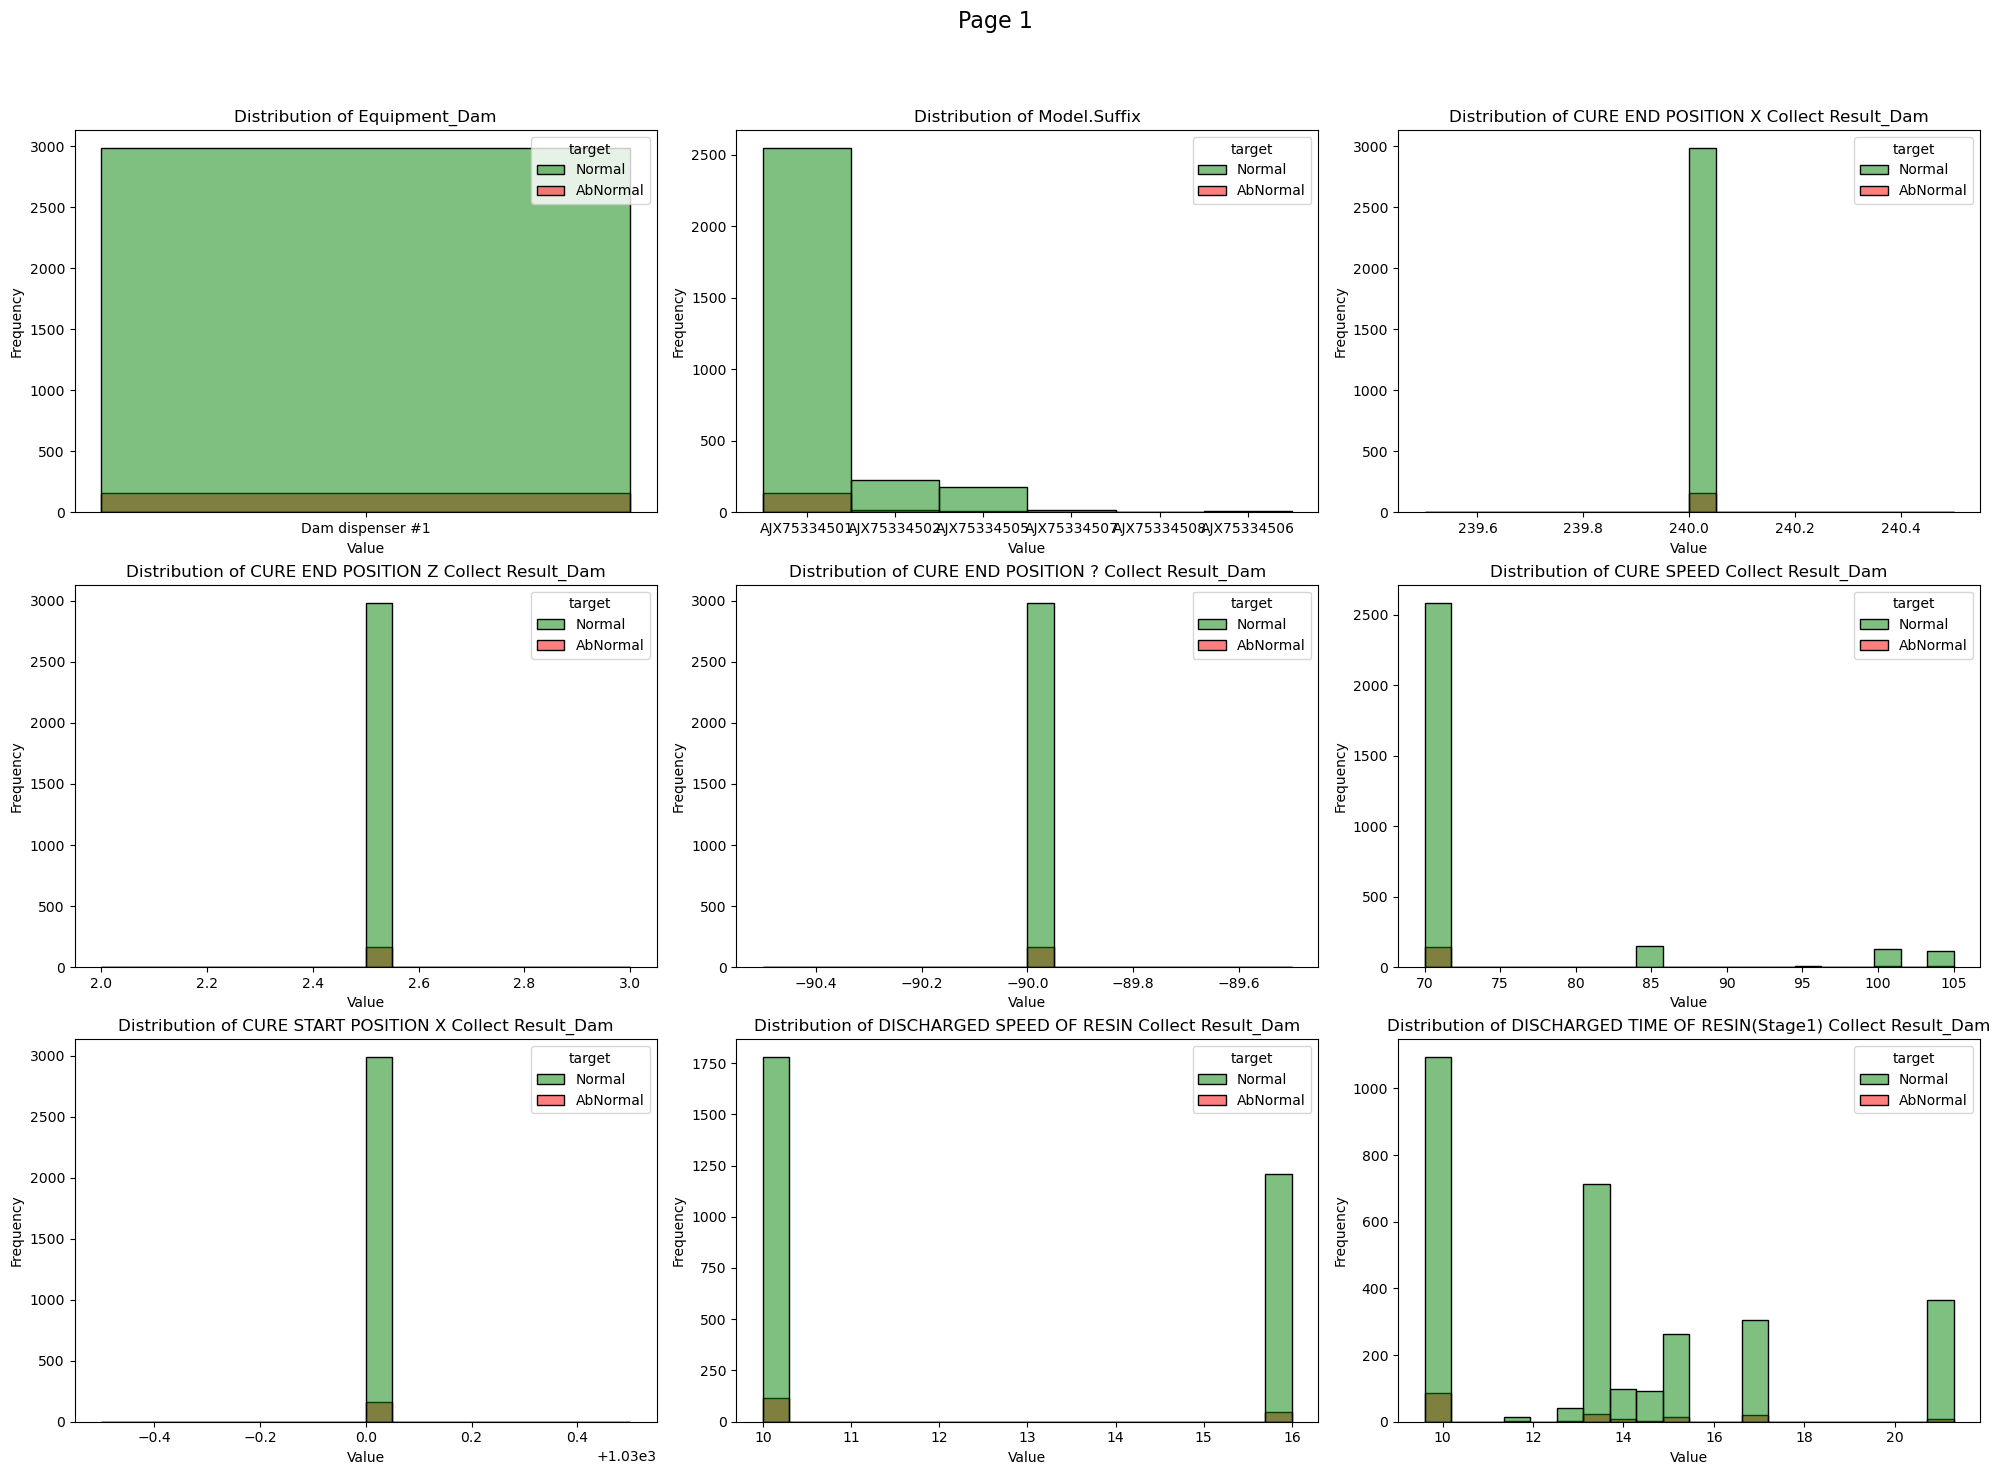

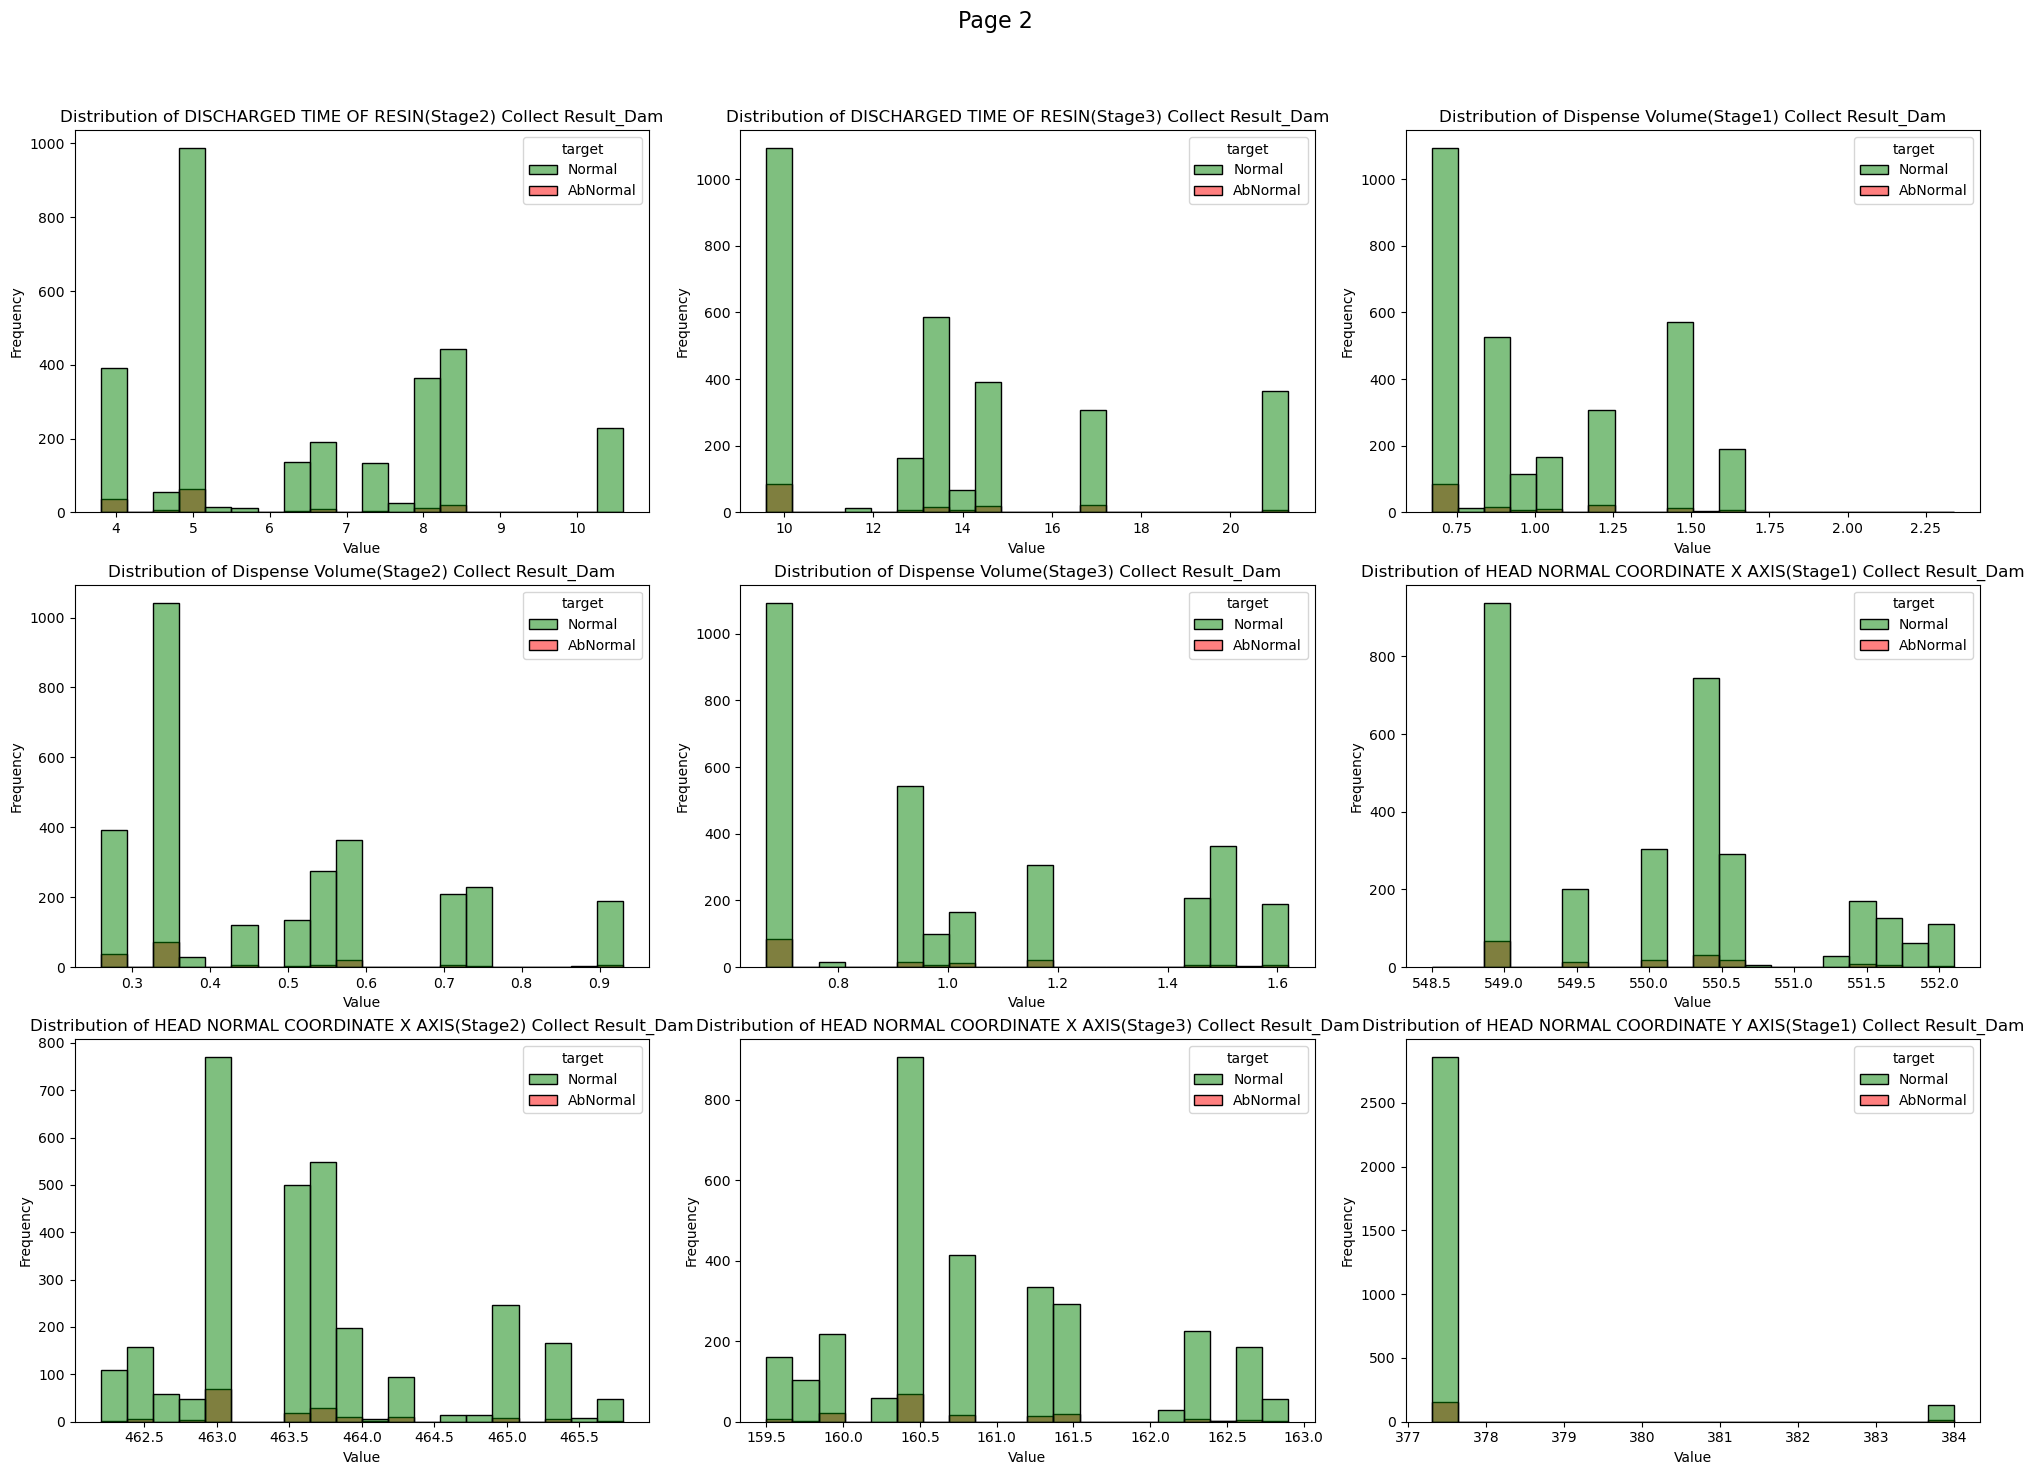

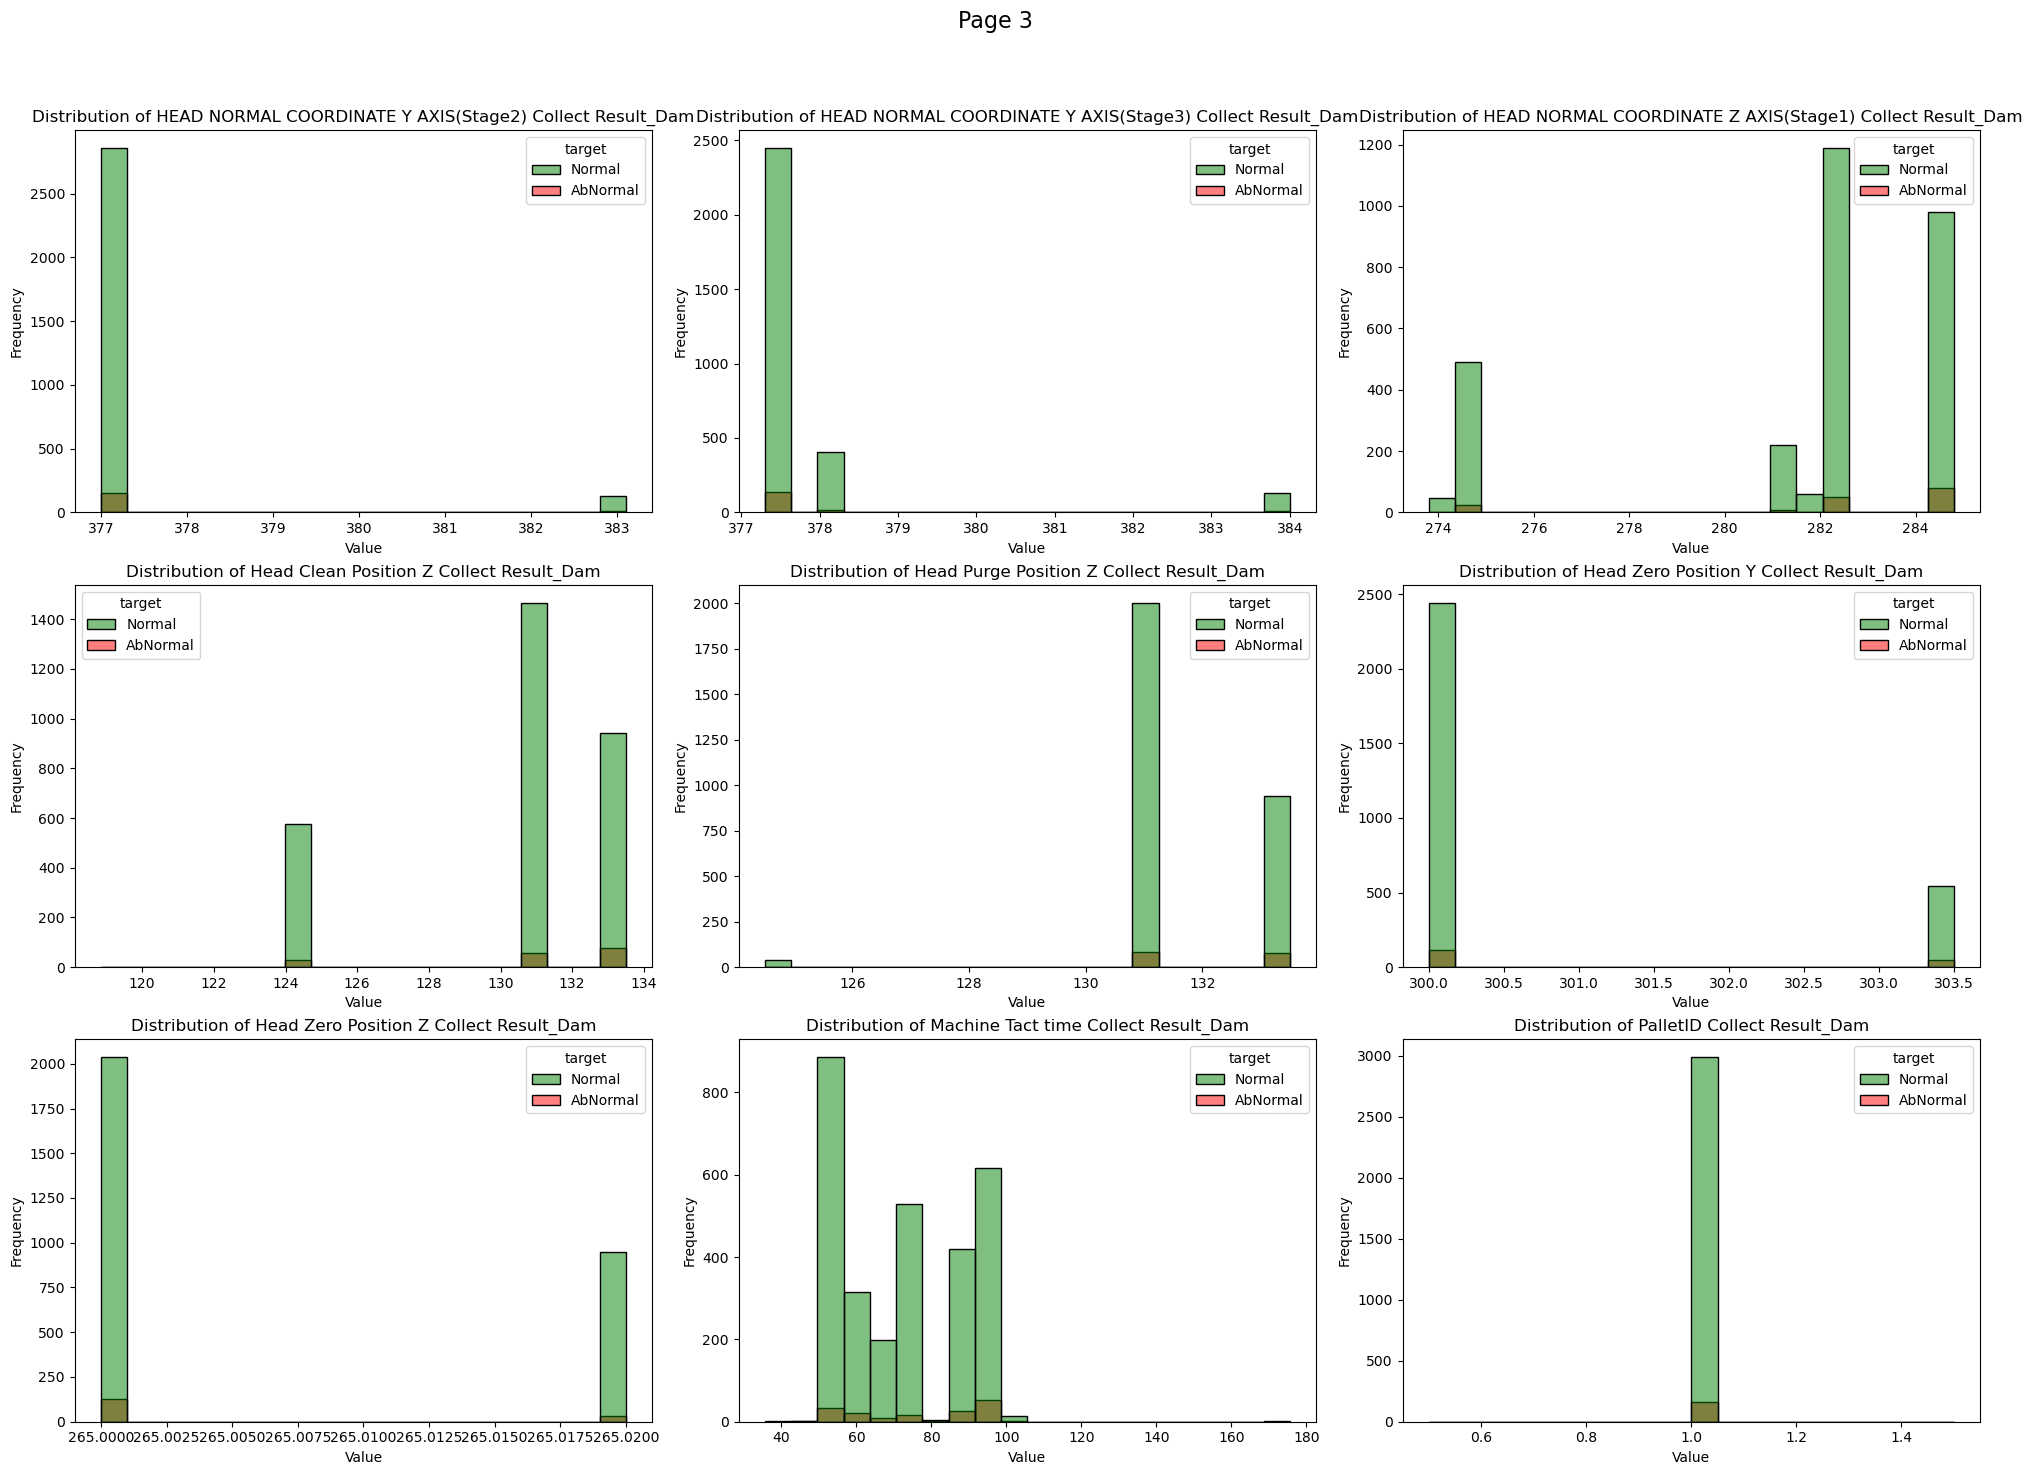

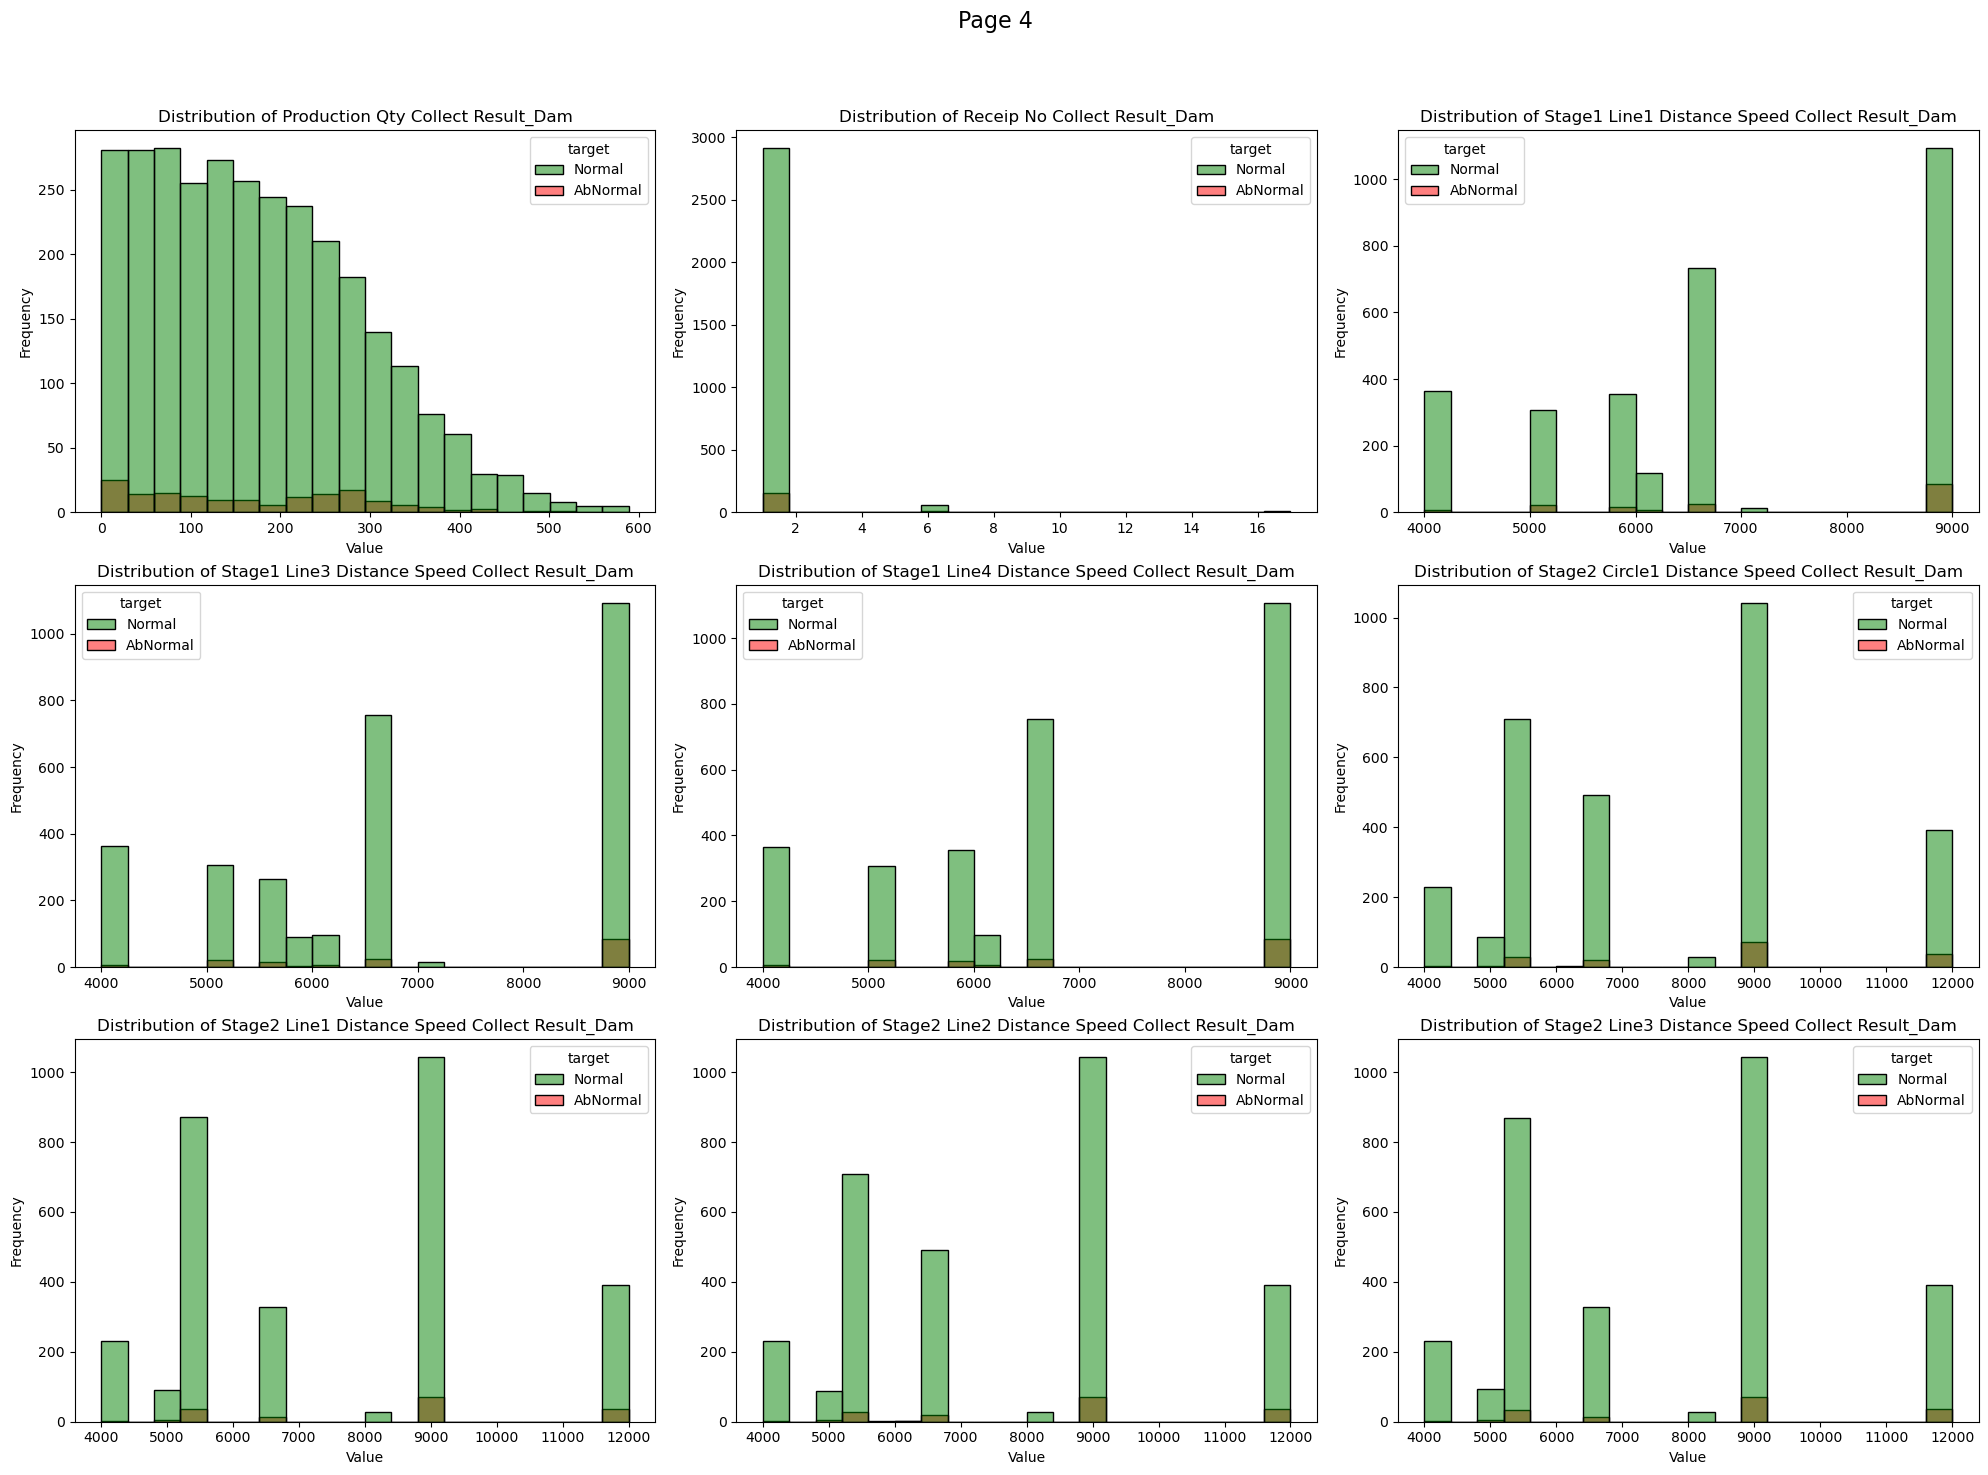

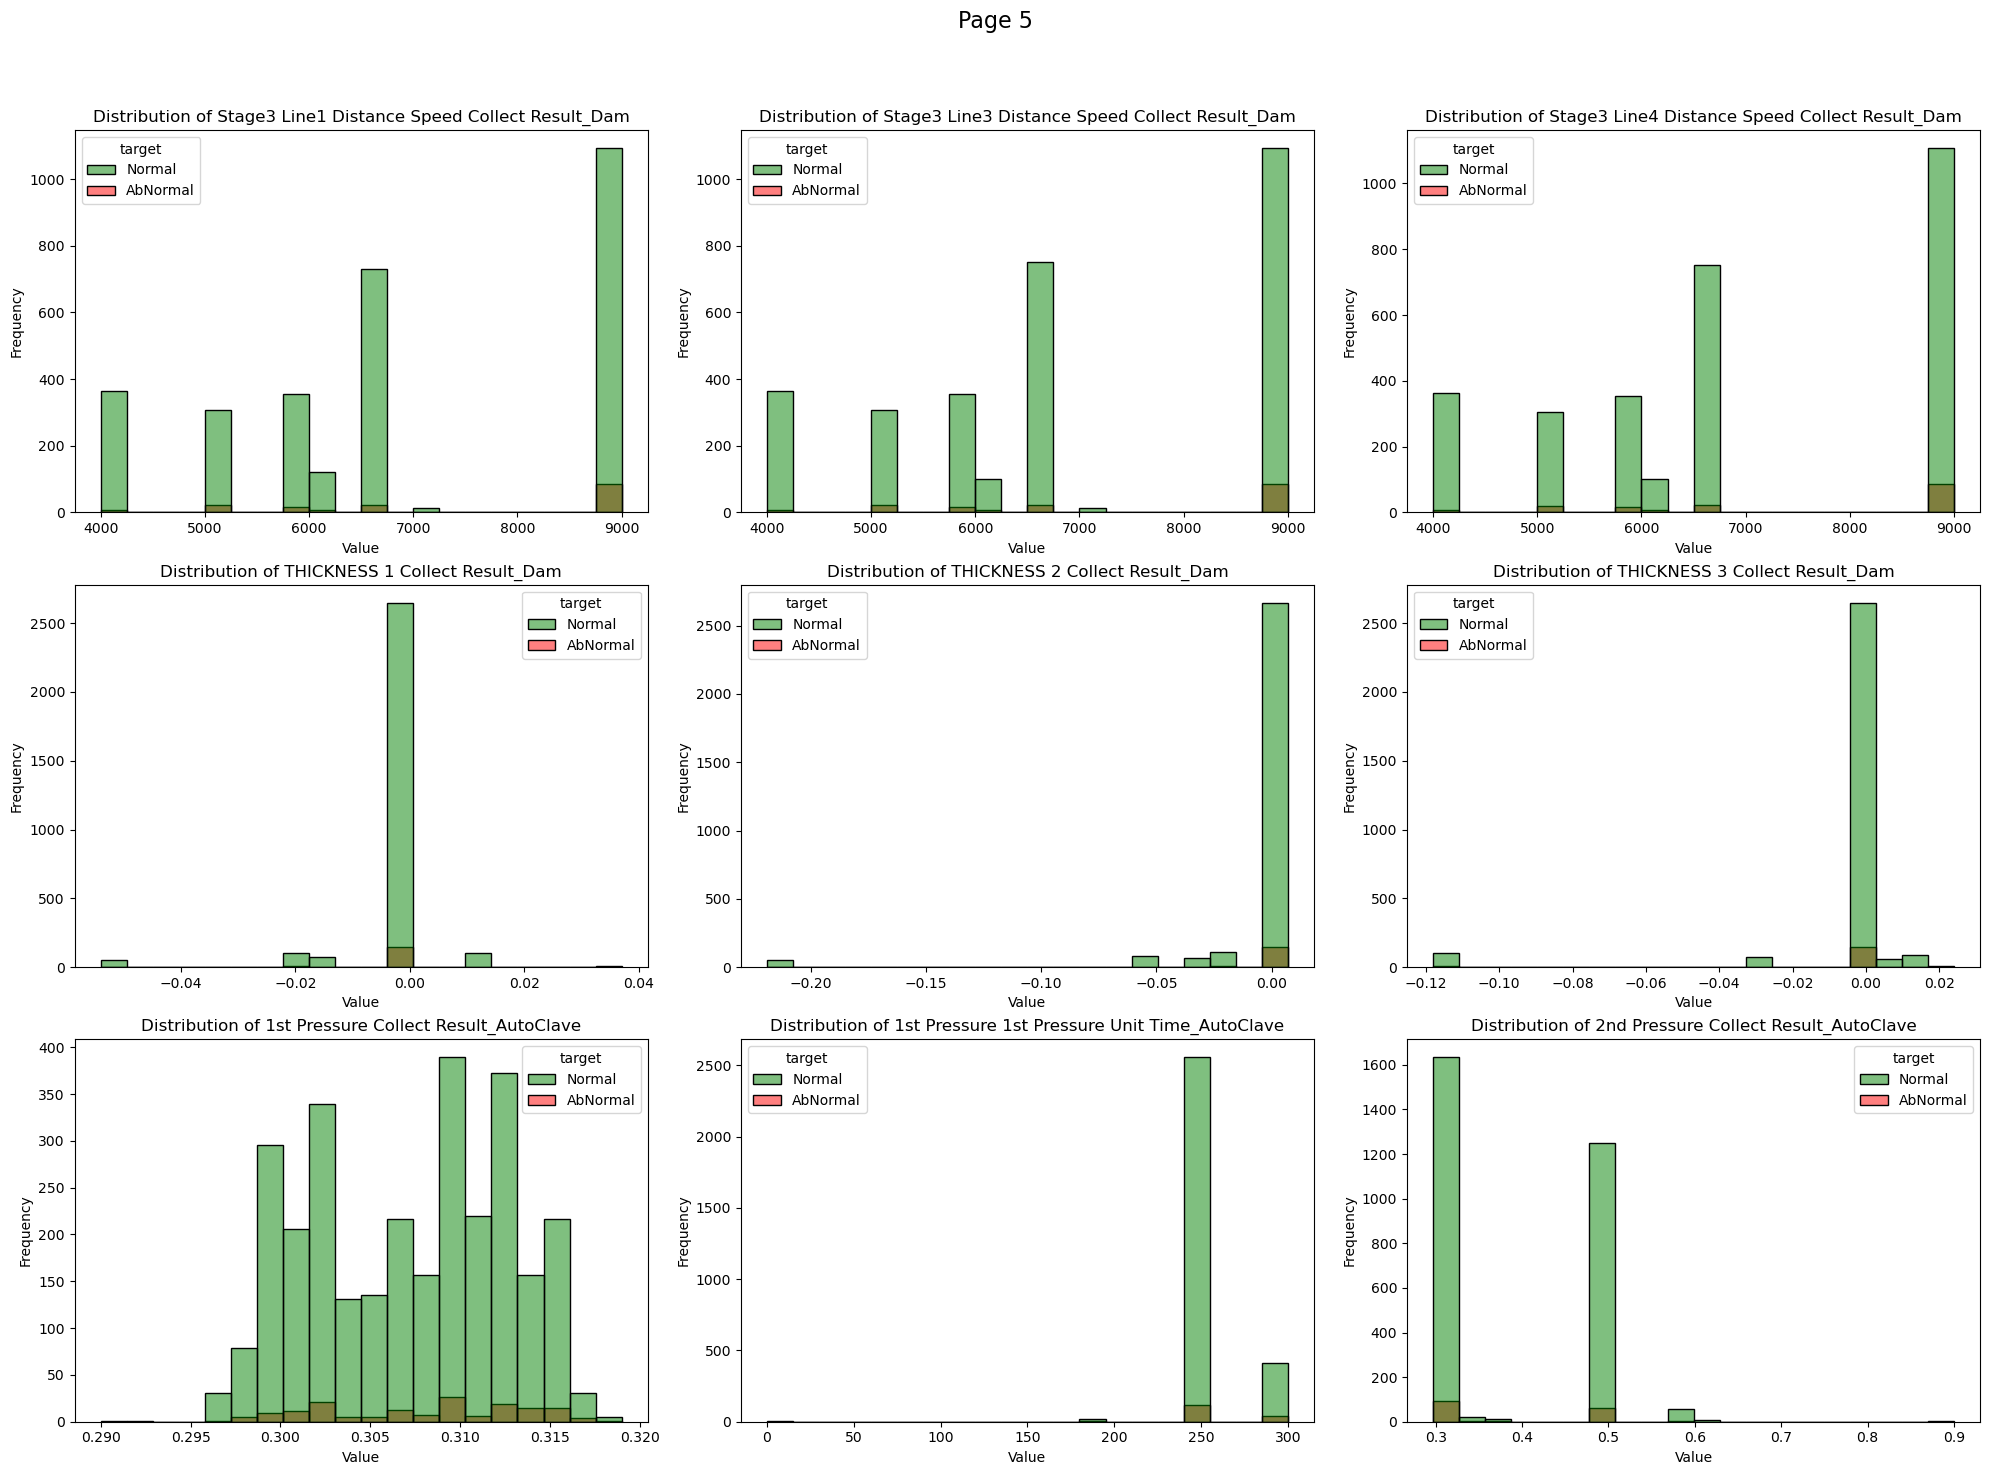

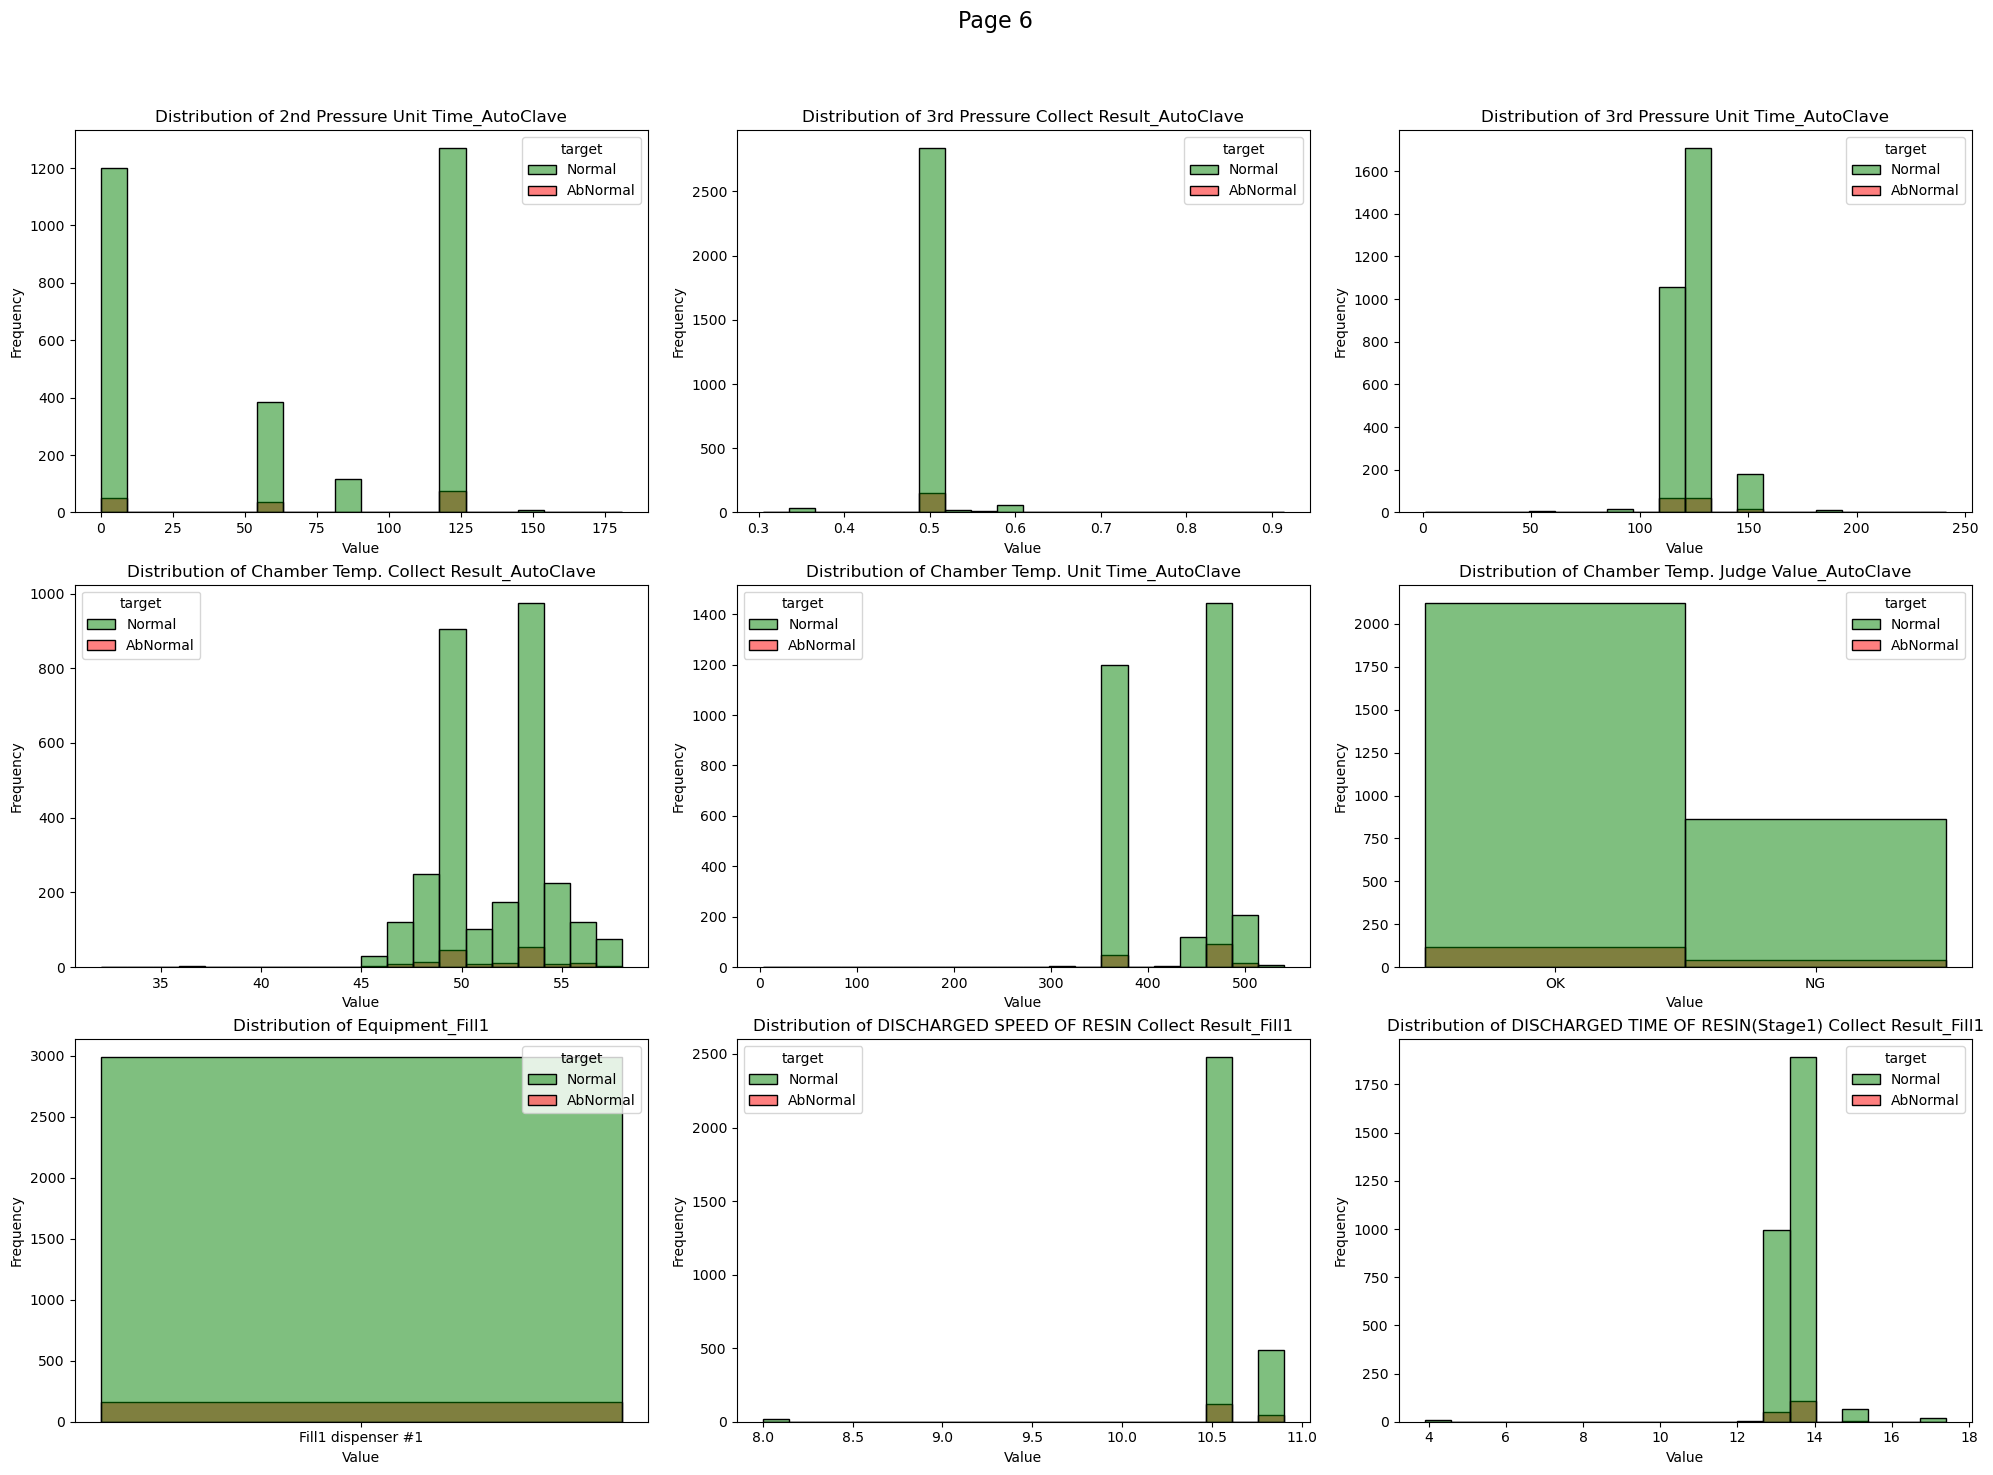

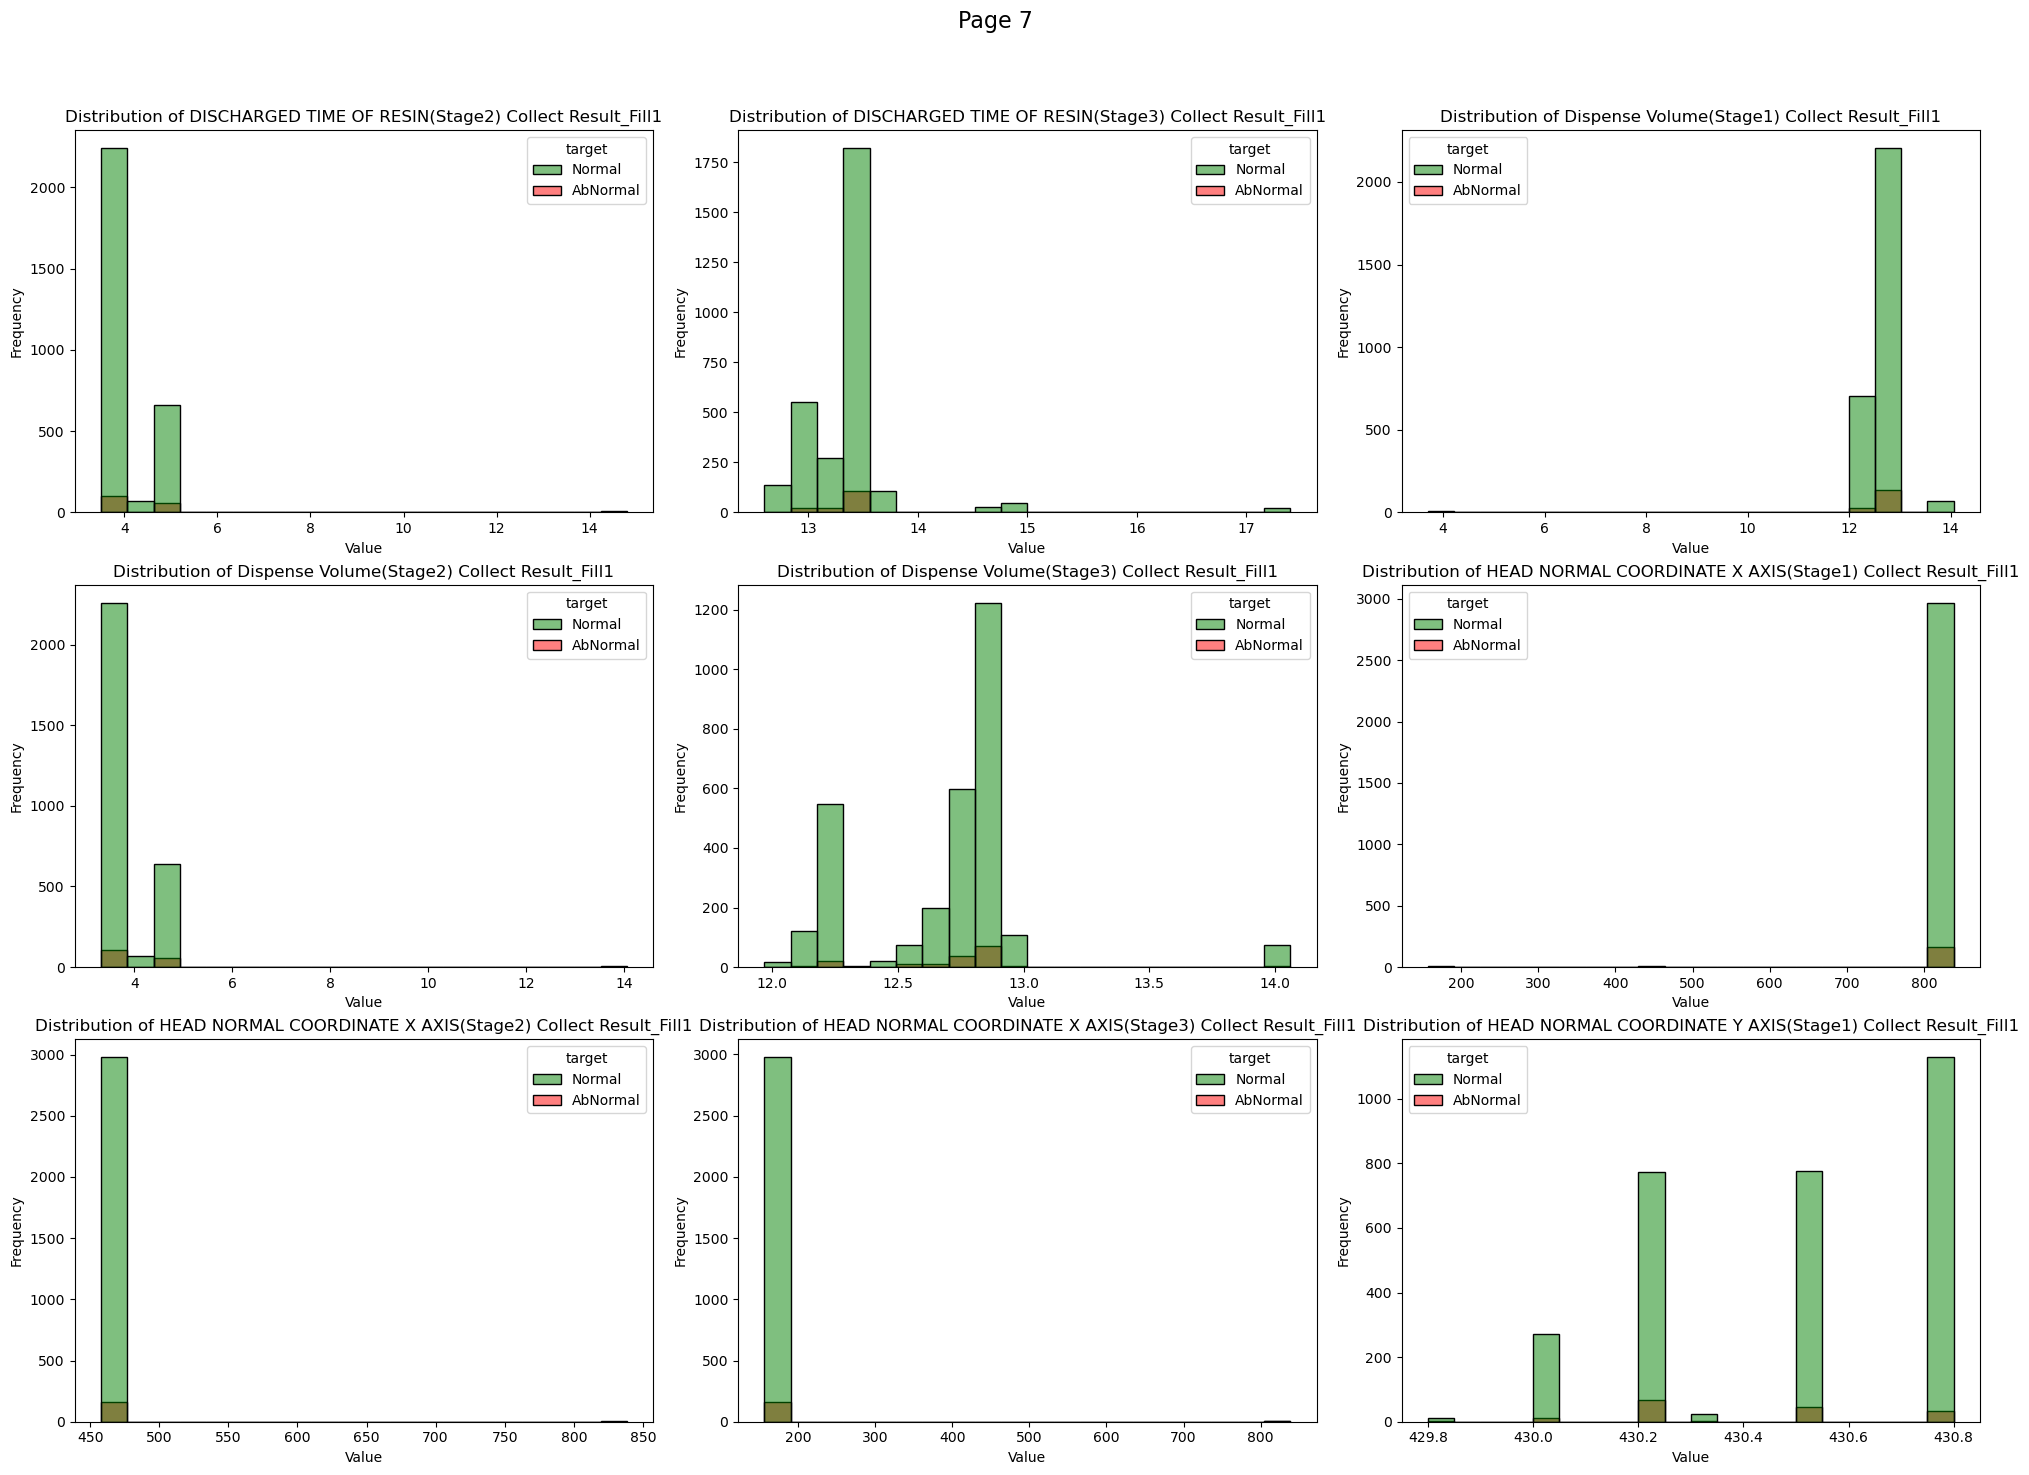

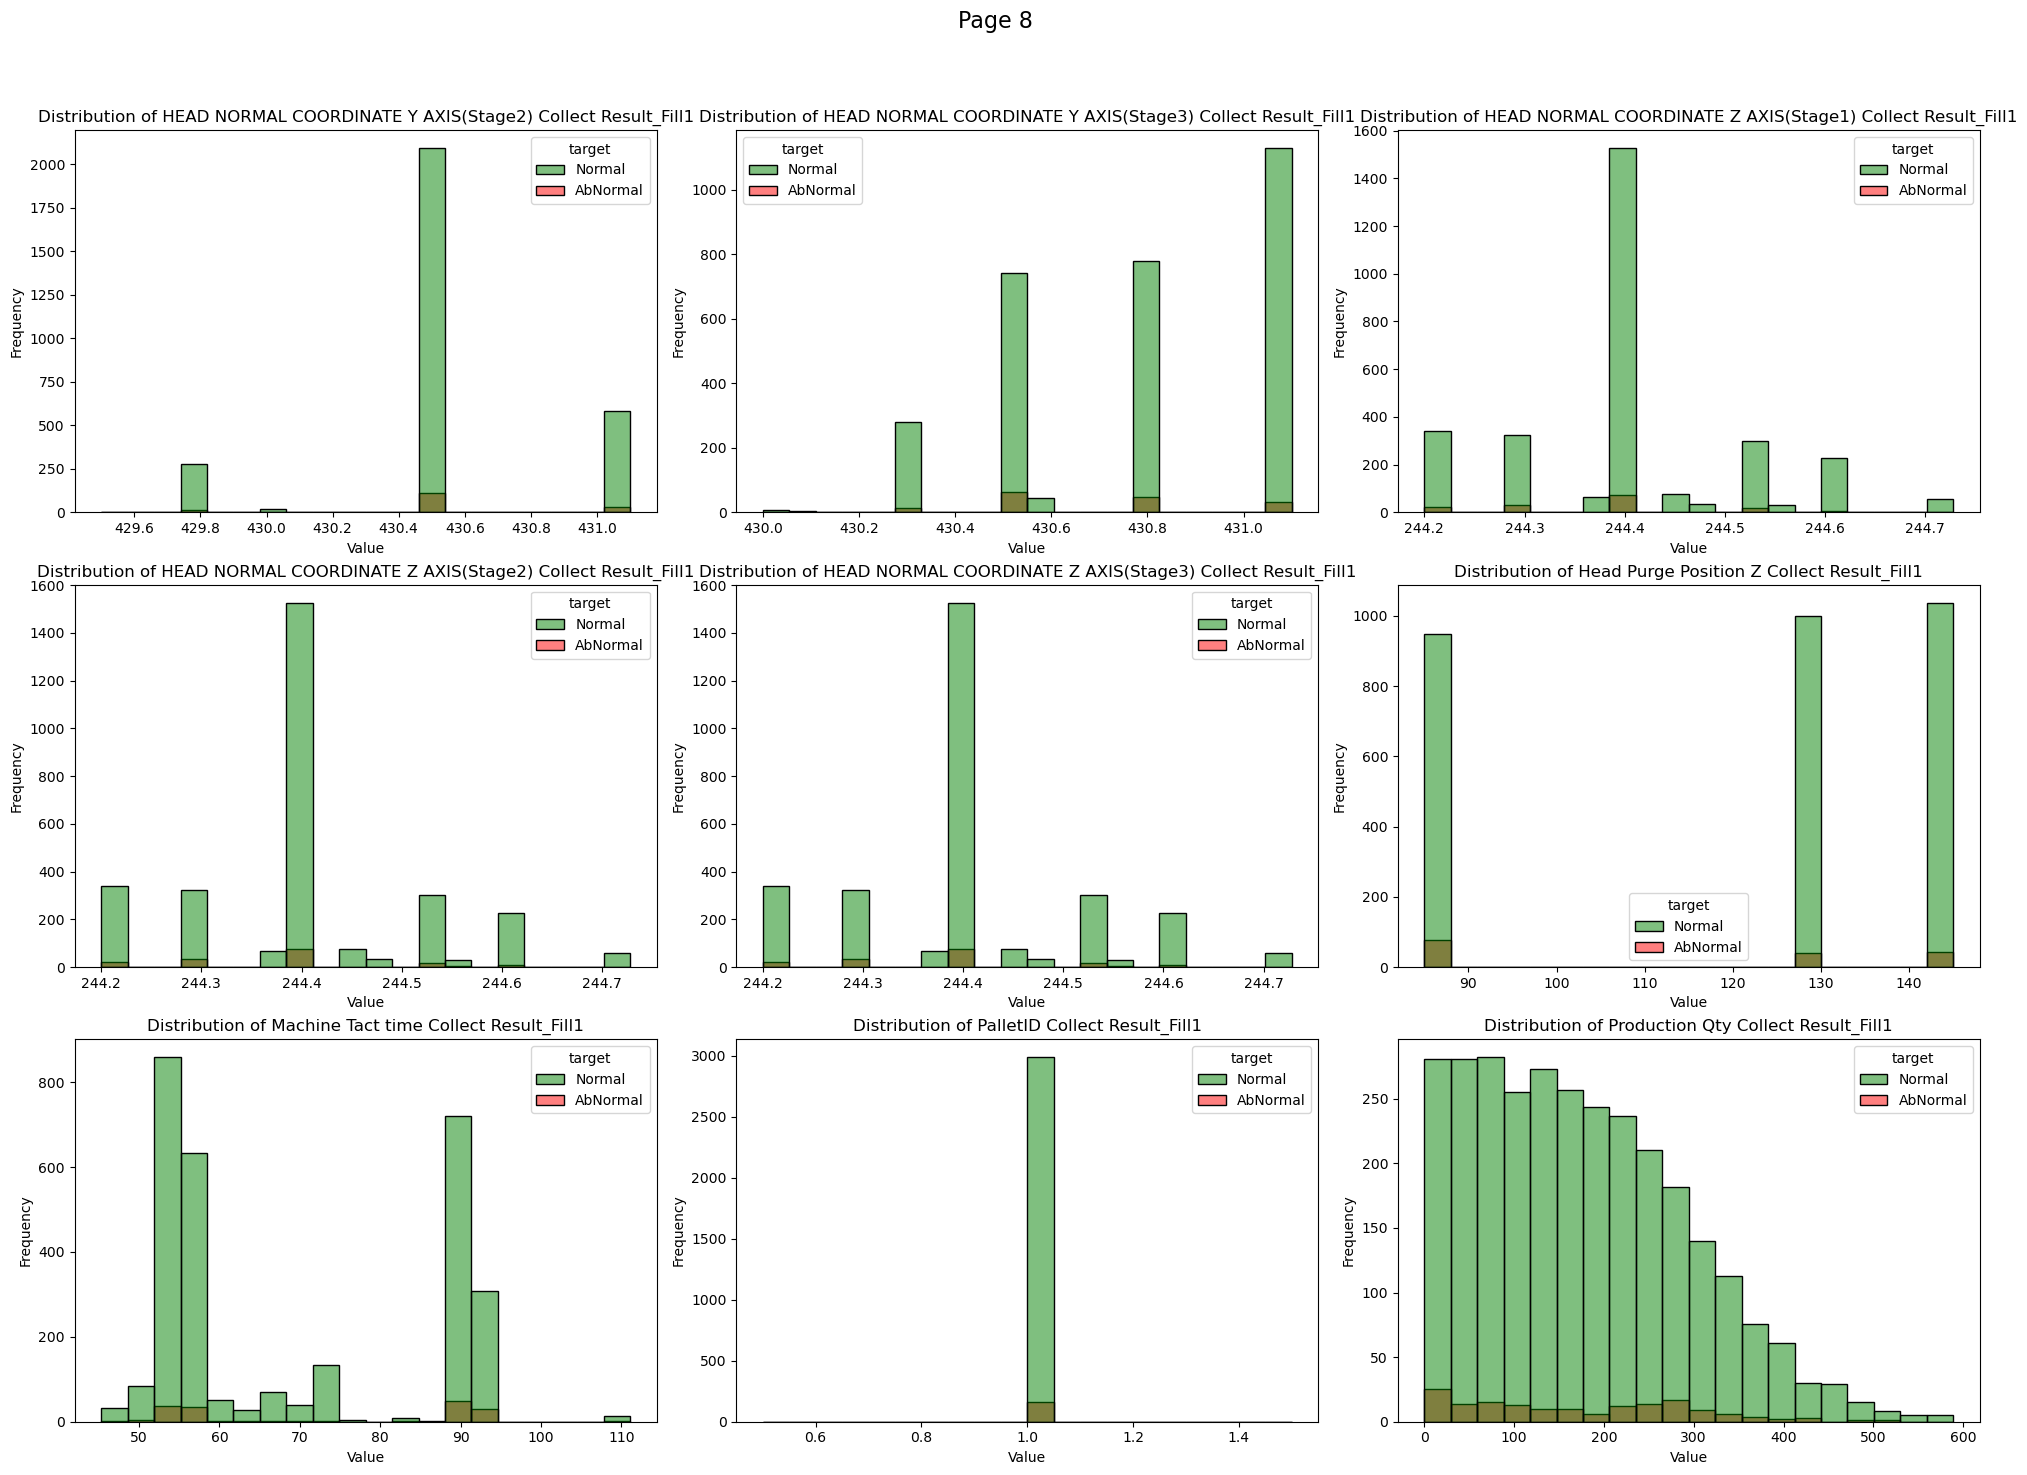

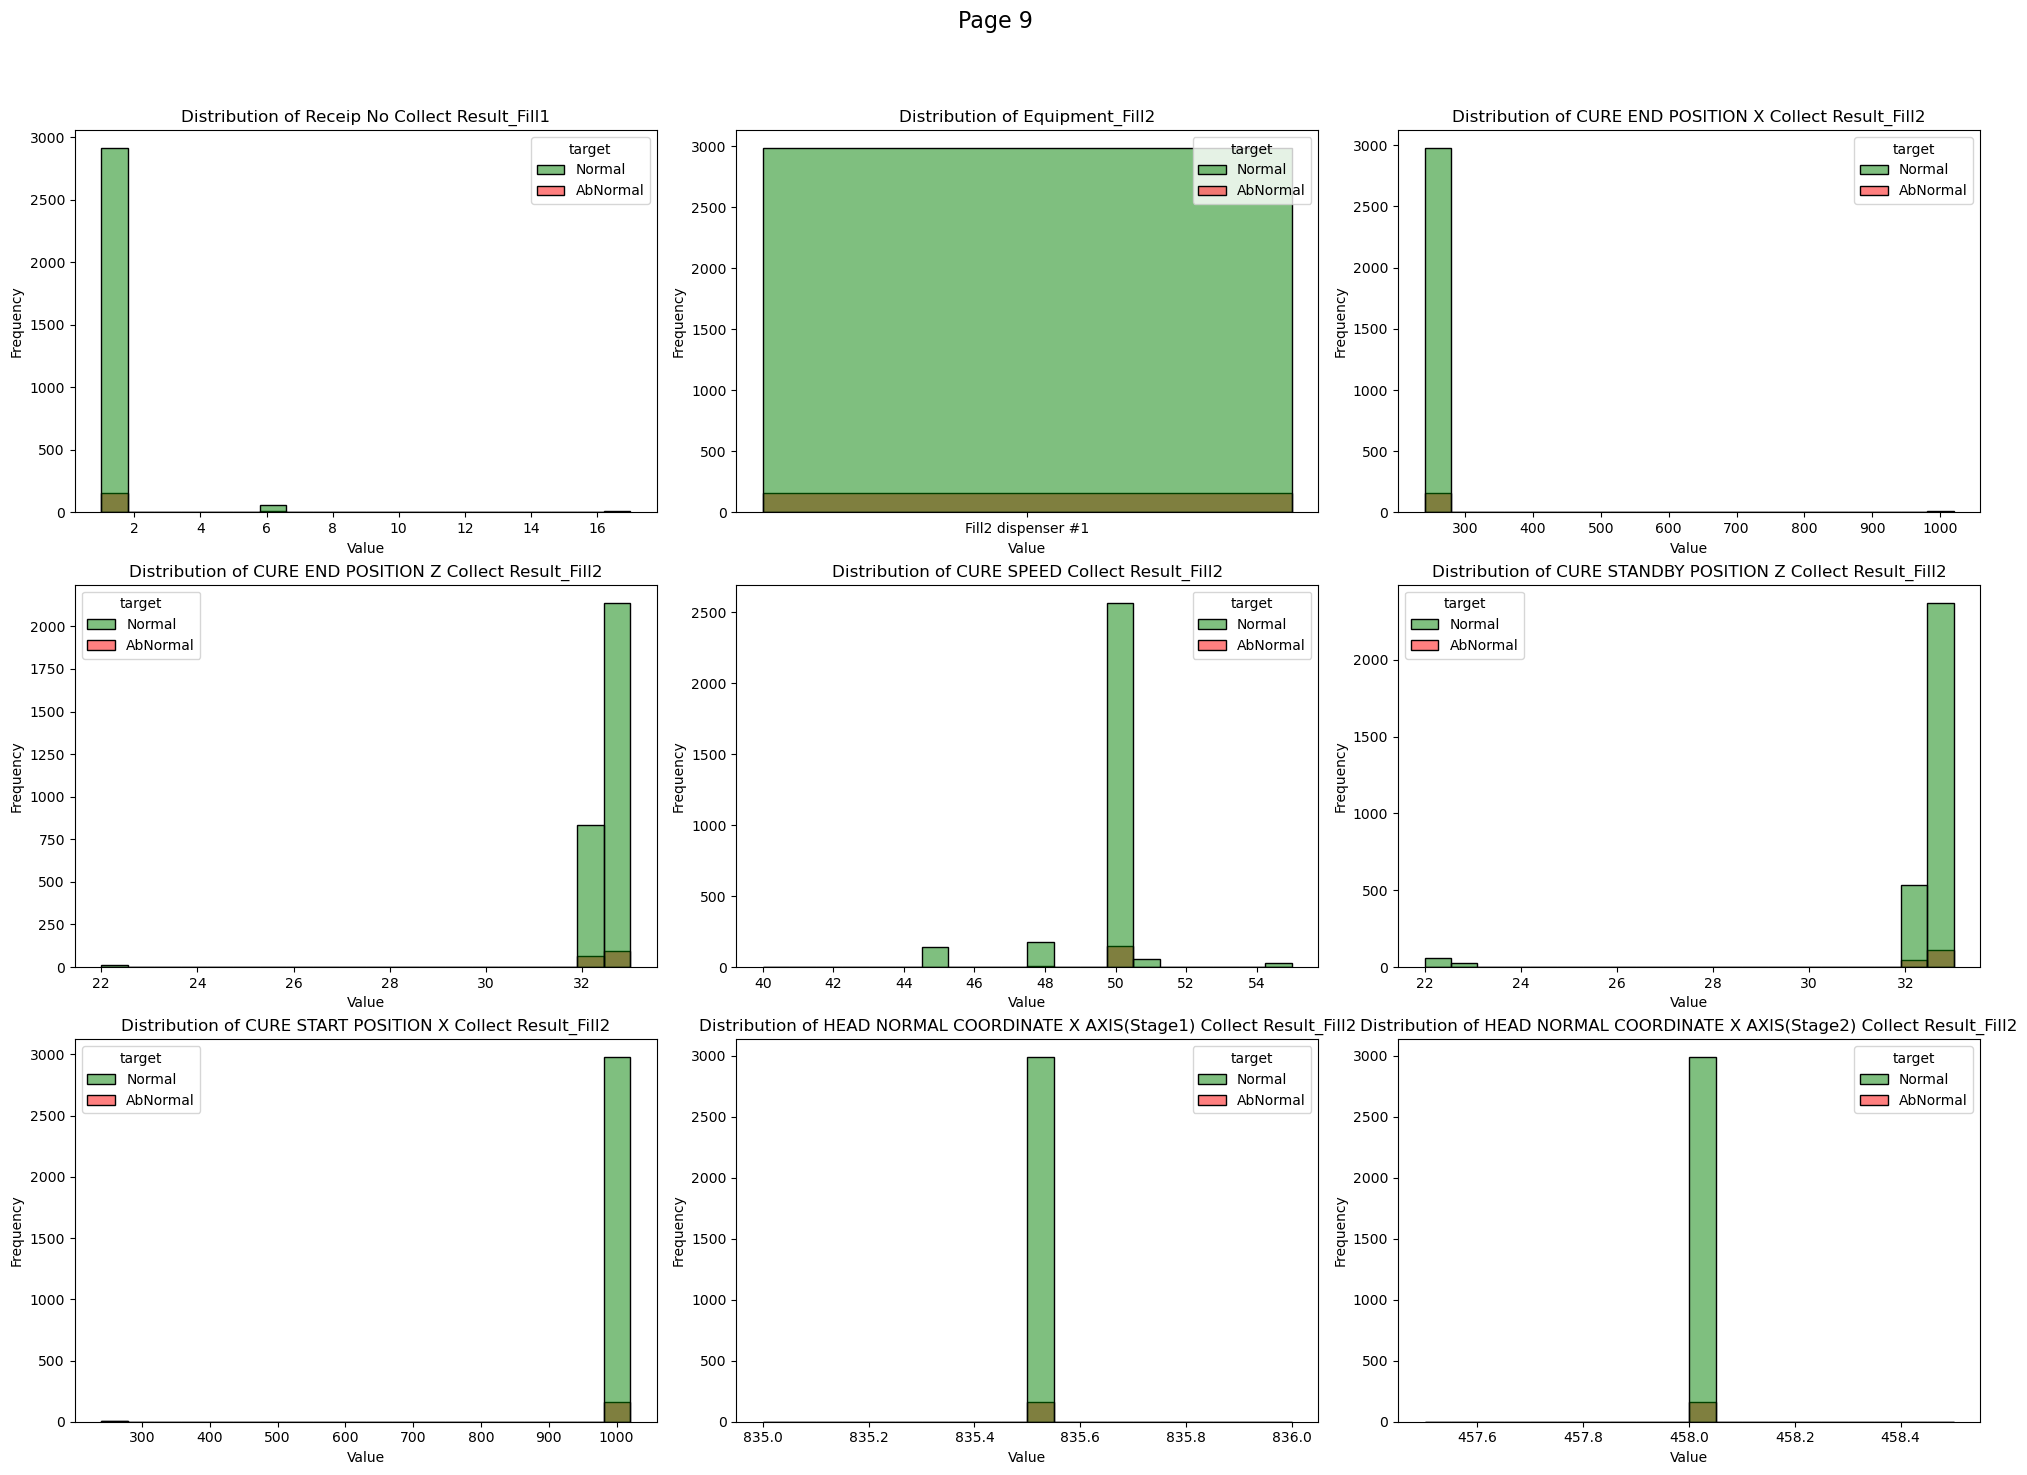

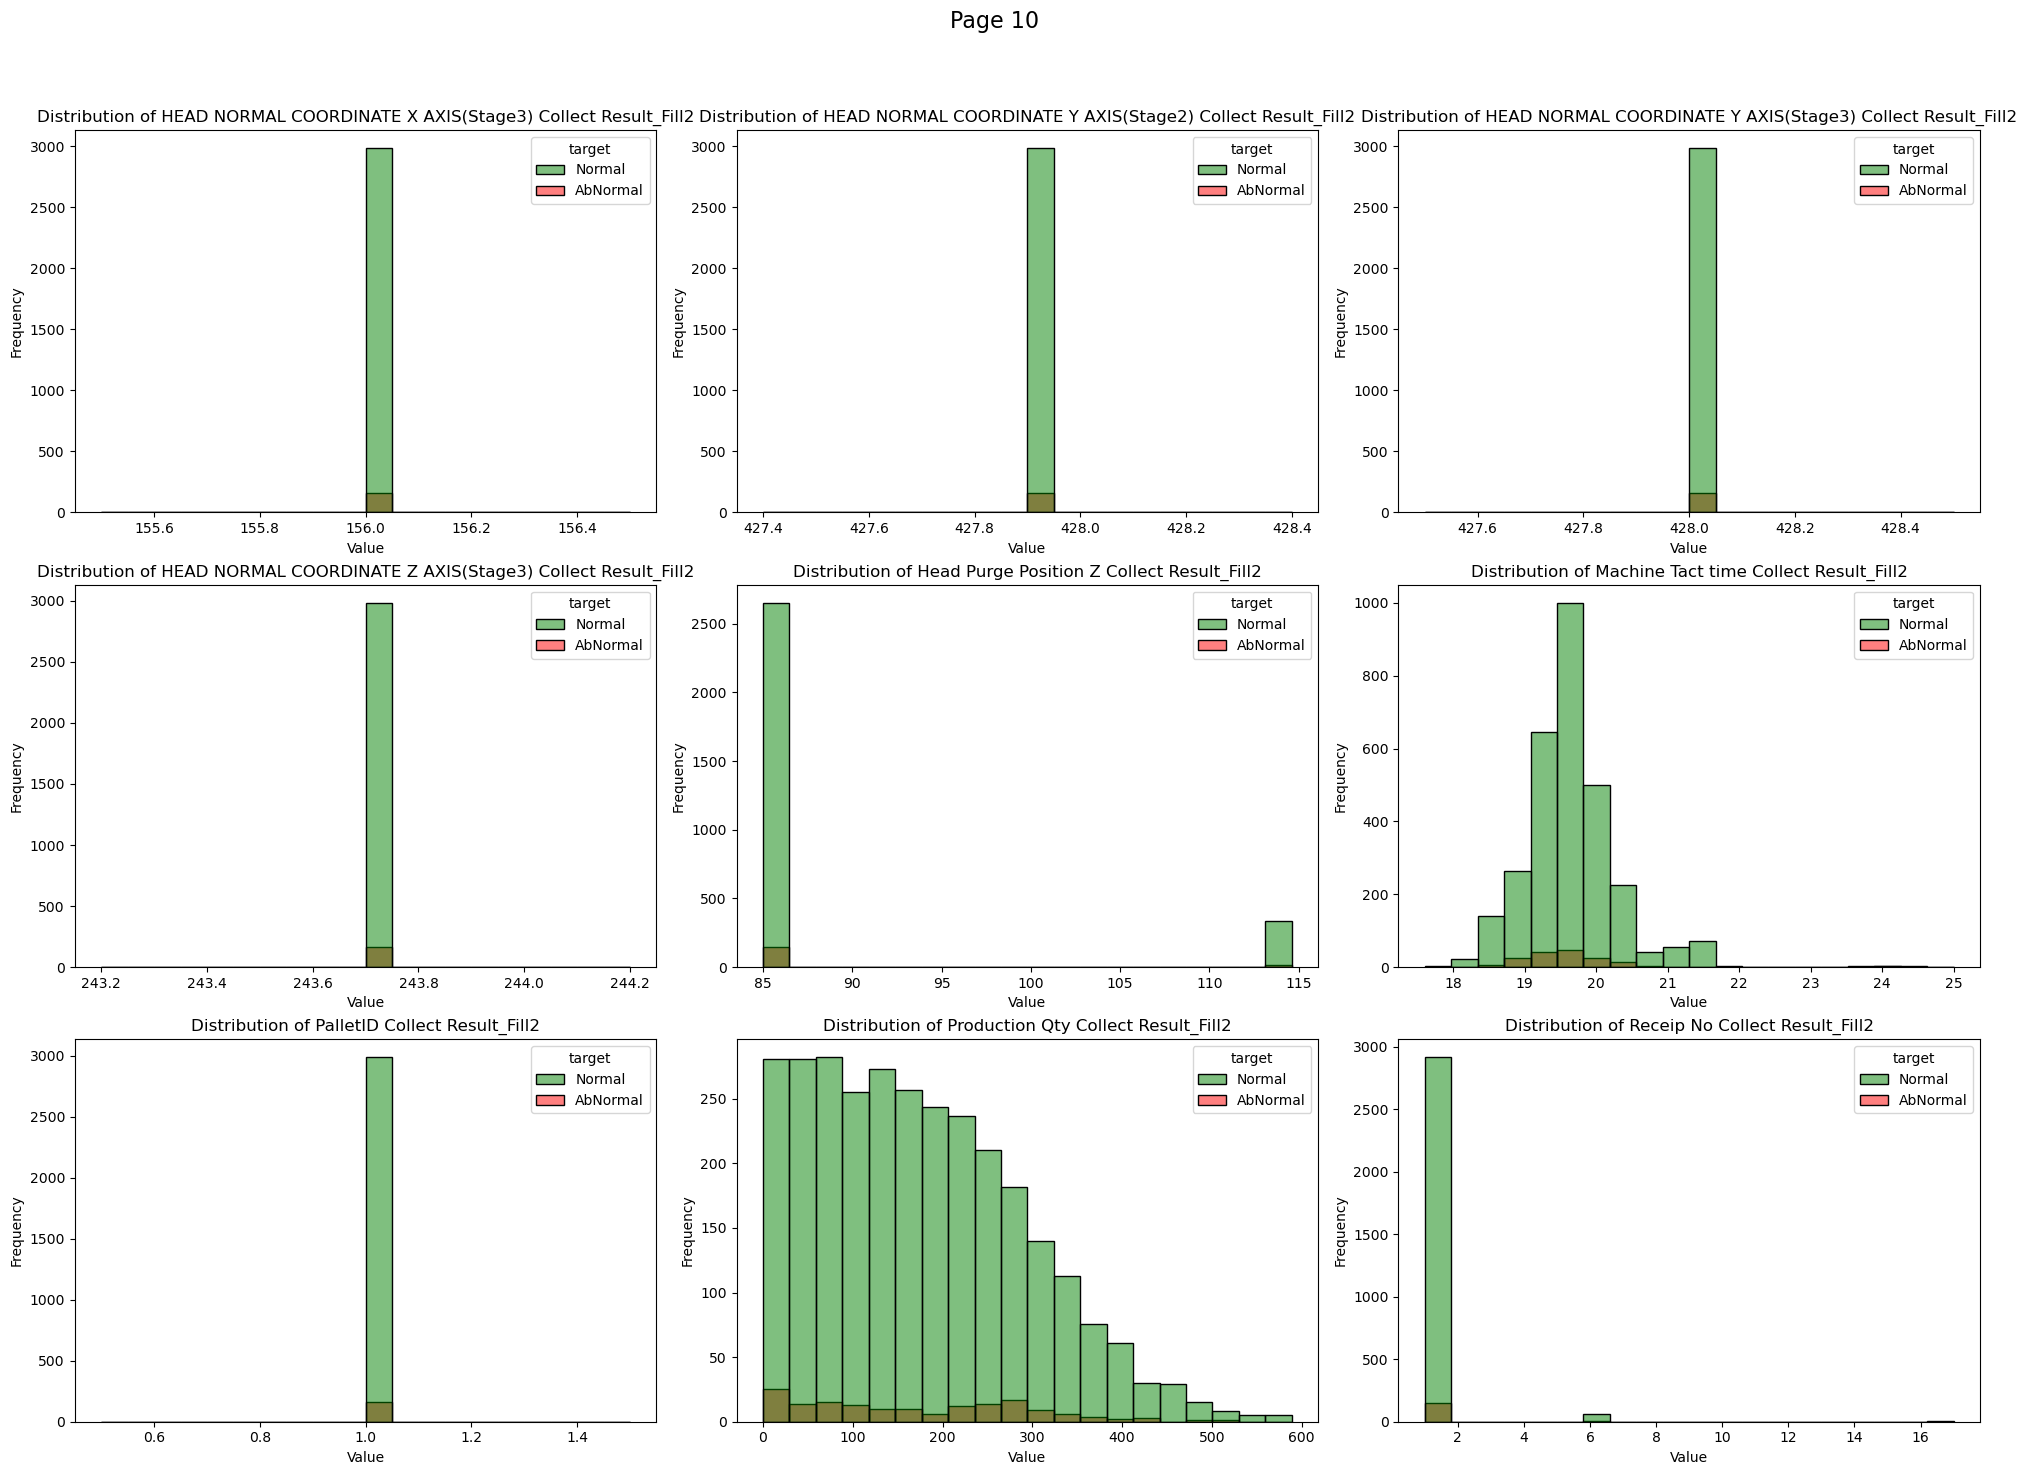

<Figure size 2000x1500 with 0 Axes>

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = {
    'Normal': 'green',
    'AbNormal': 'red'
}

# 한 페이지에 보여줄 플롯 수 설정
plots_per_page = 9
num_pages = (len(eq1_id1.columns) - 1) // plots_per_page + 1

# 페이지별로 서브플롯 그리기
for page in range(num_pages):
    start_idx = page * plots_per_page
    end_idx = min(start_idx + plots_per_page, len(eq1_id1.columns)-1)
    features = eq1_id1.columns[start_idx:end_idx]

    # 페이지별 서브플롯 그리기
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        ax = axes[i]
        sns.histplot(
            data=eq1_id1,
            x=feature,
            hue='target',
            palette=palette,
            ax=ax,
            bins=20,
            element='bars',  # 선택사항: 빈의 외곽선 표시
            kde=False
        )
        ax.set_title(f'Distribution of {feature}')
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')

    # 사용되지 않는 서브플롯 숨기기
    for j in range(len(features), len(axes)):
        fig.delaxes(axes[j])

    # 서브플롯 간의 간격 조정
    plt.tight_layout()
    plt.suptitle(f'Page {page+1}', fontsize=16)
    plt.subplots_adjust(top=0.9)
    plt.show()

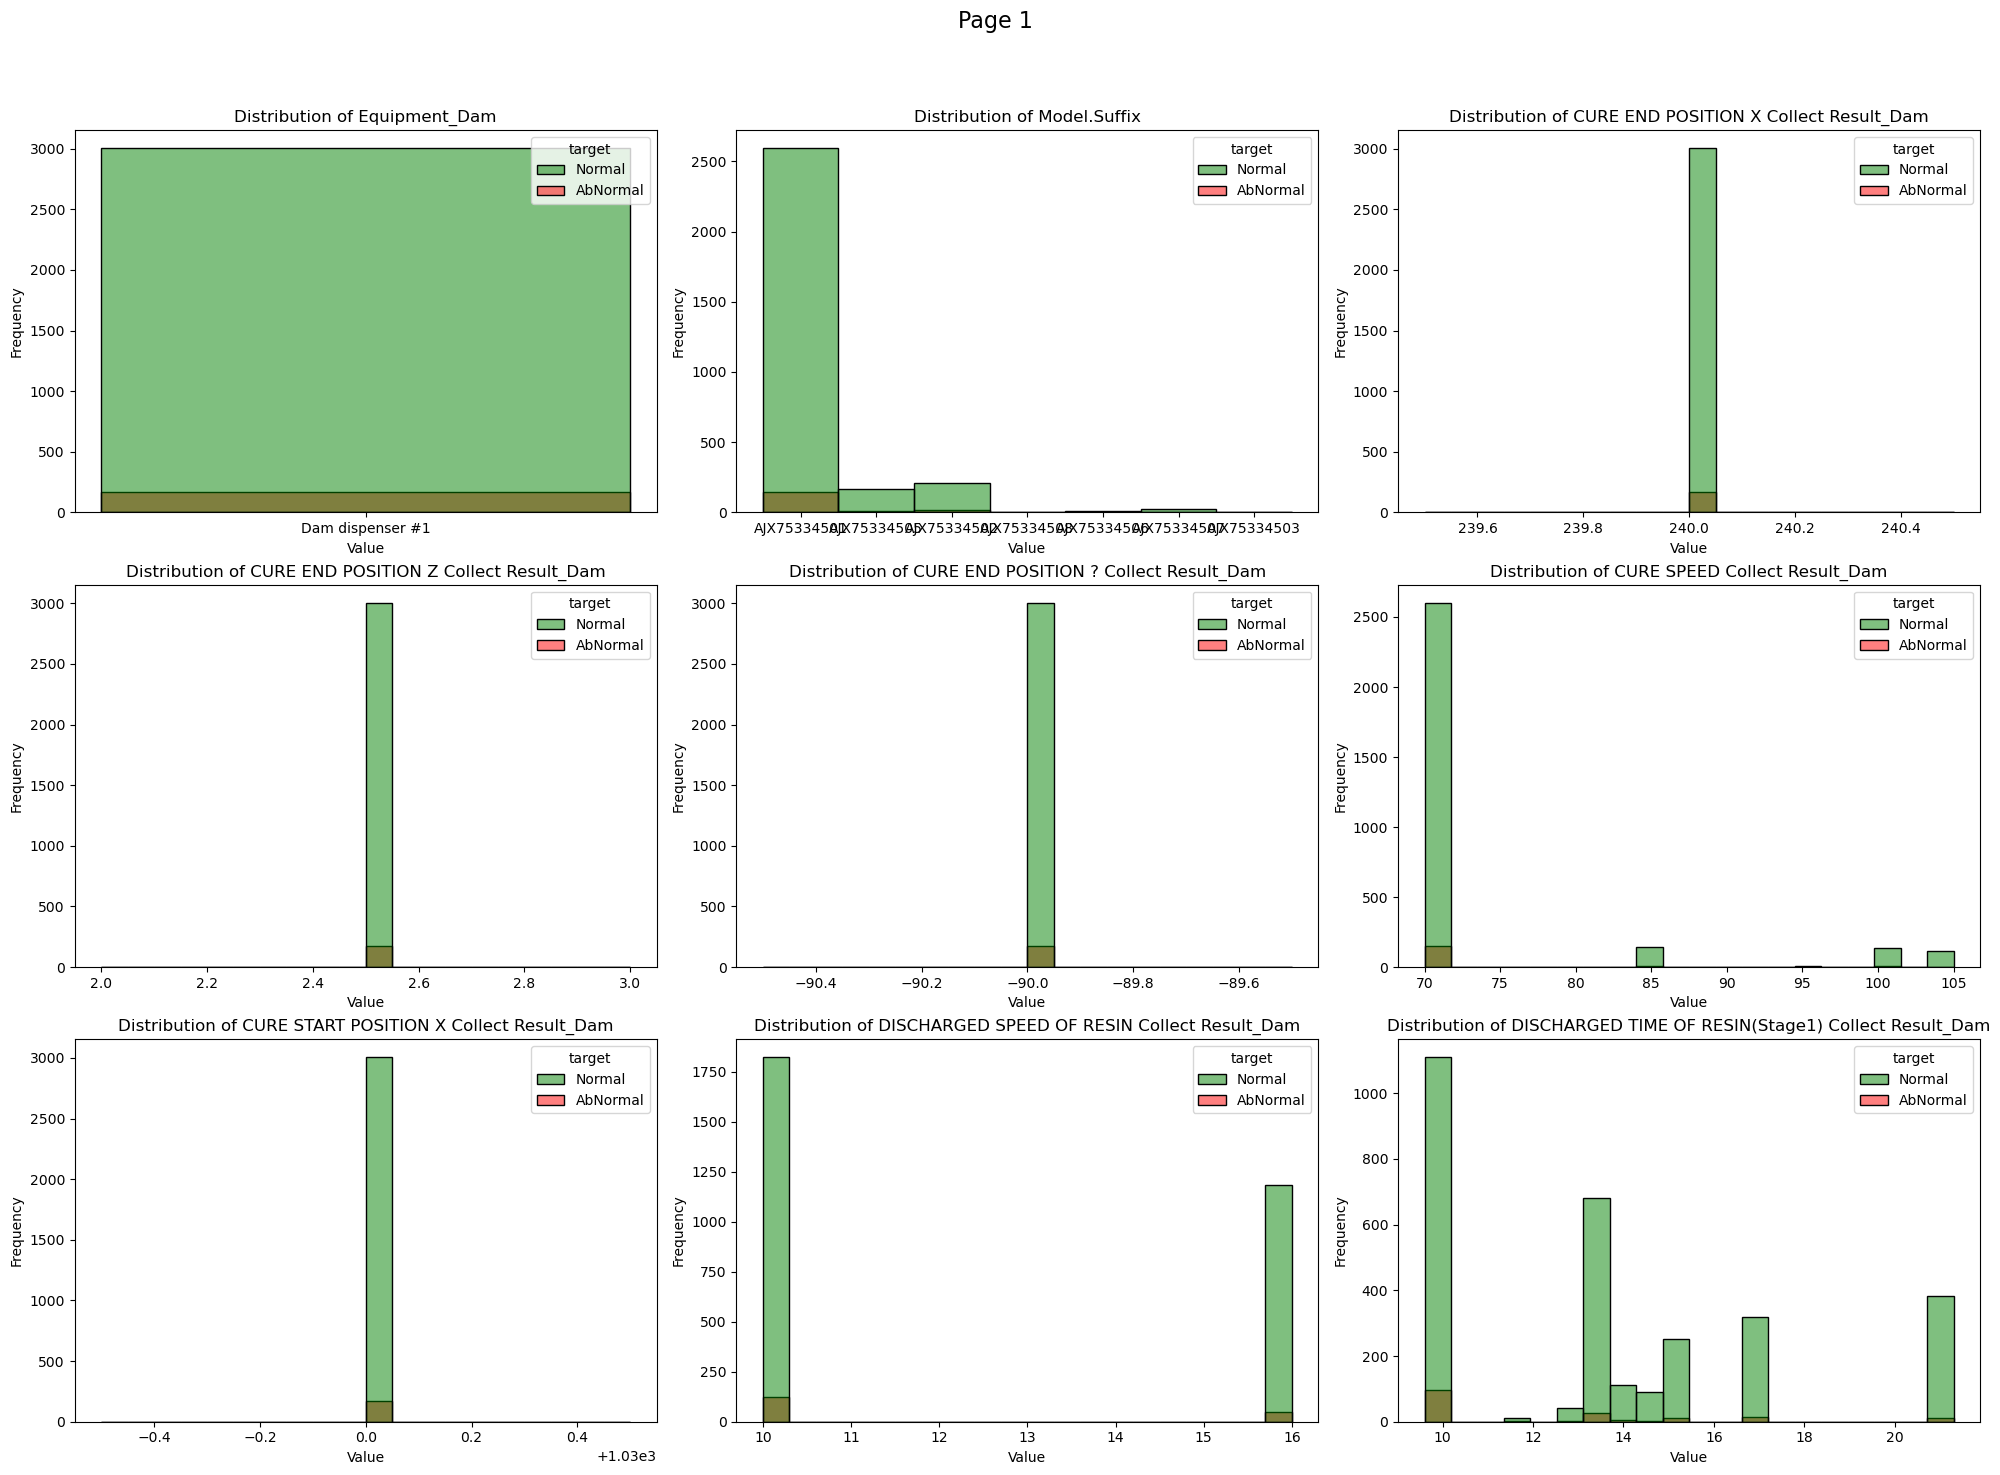

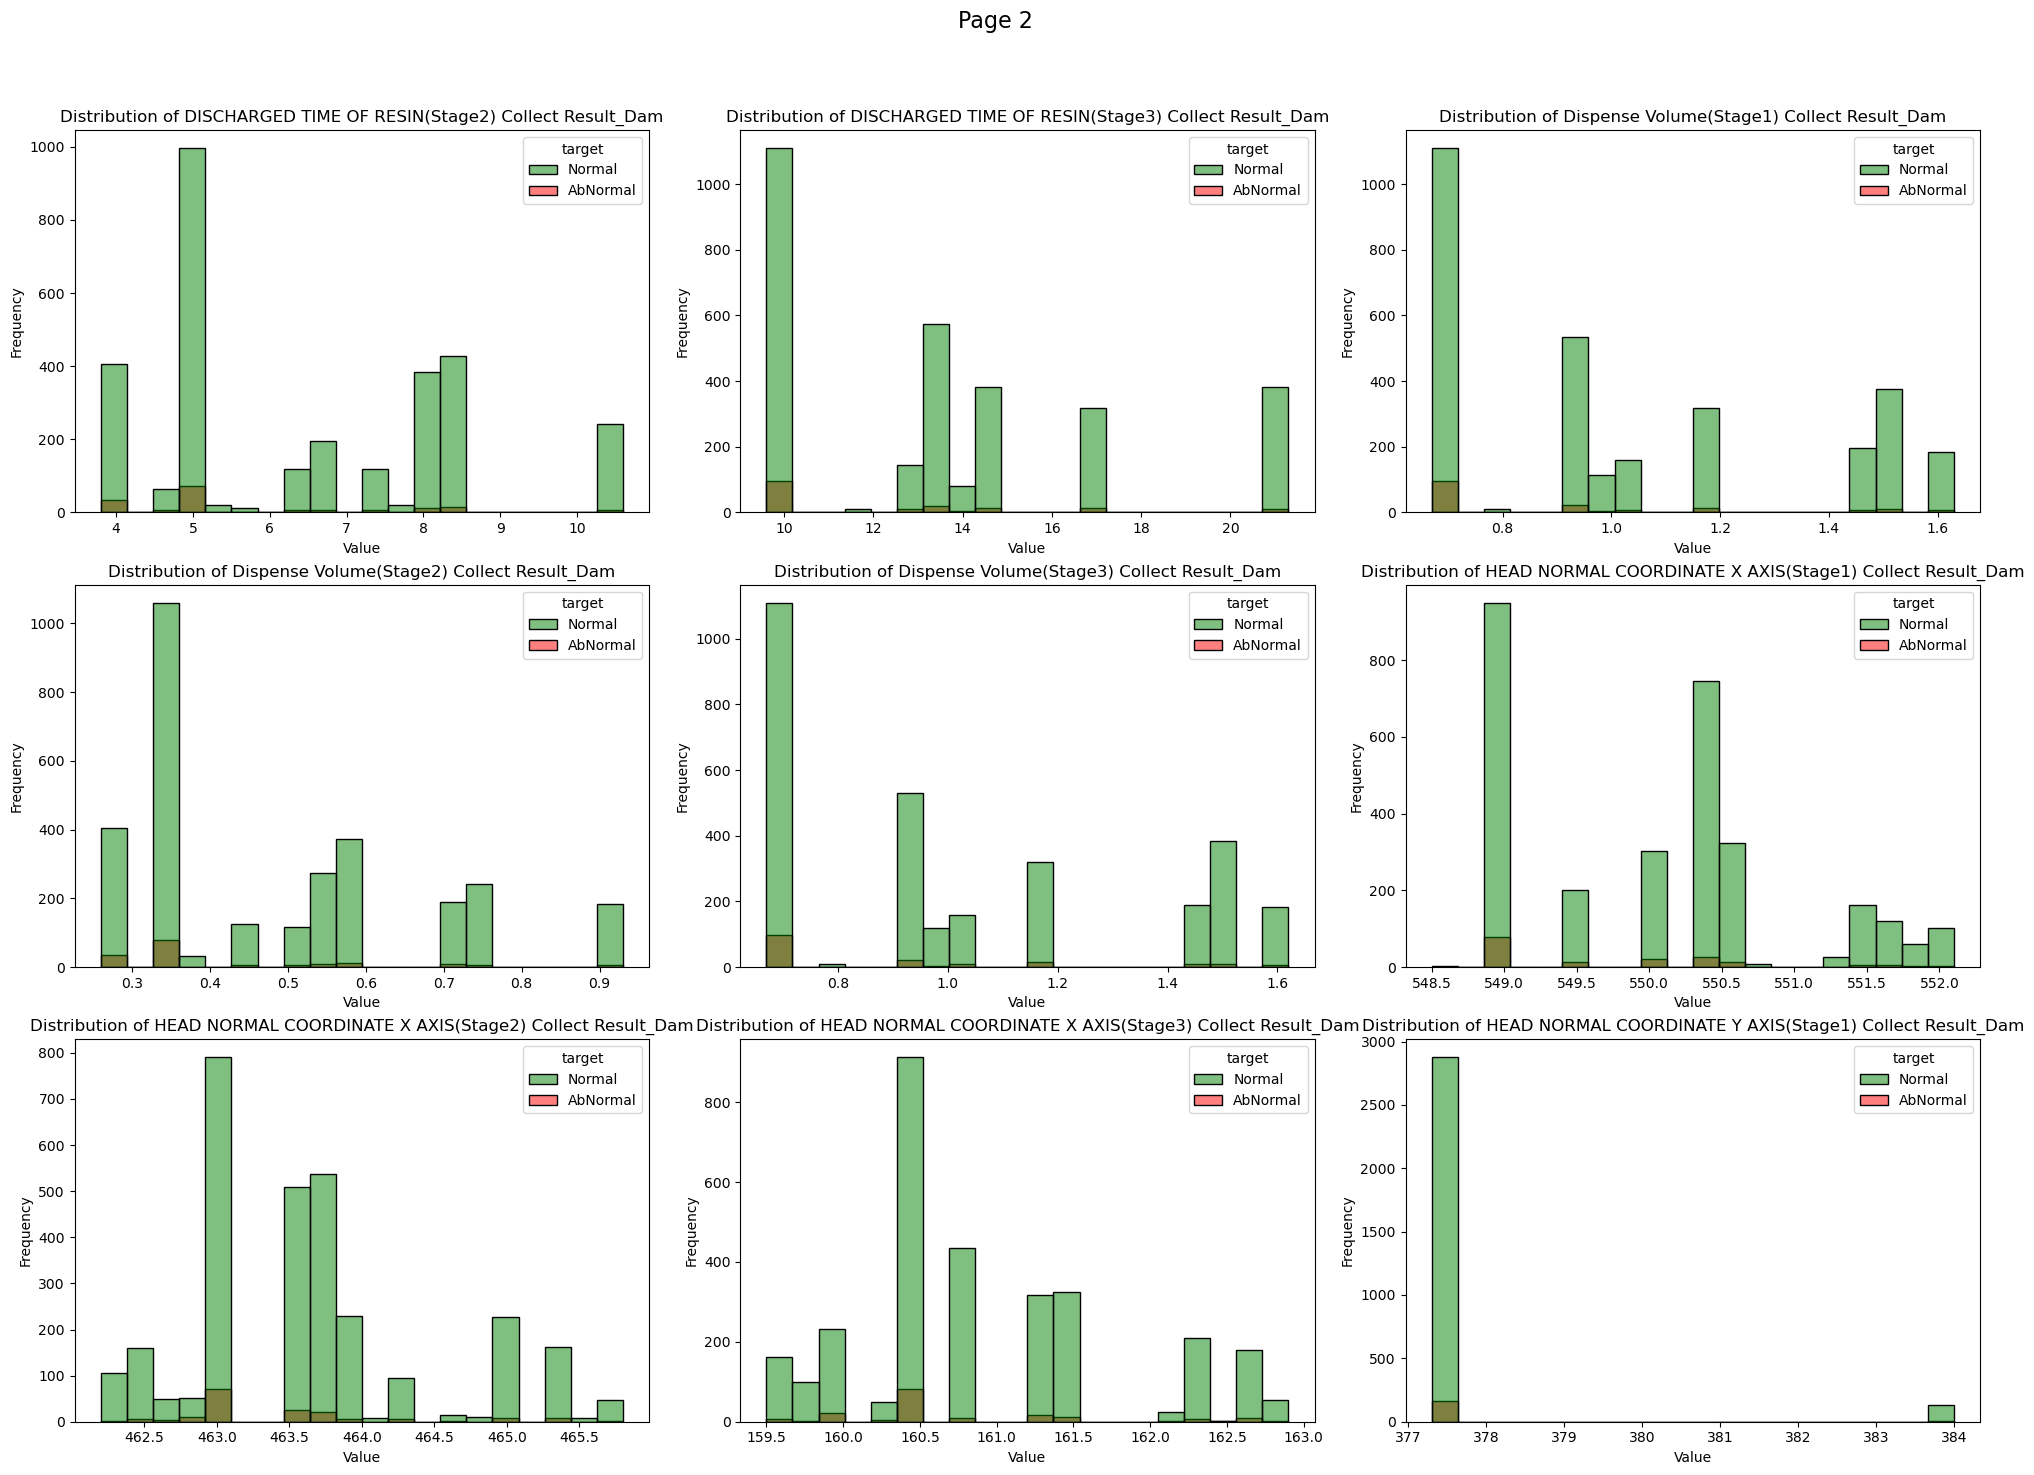

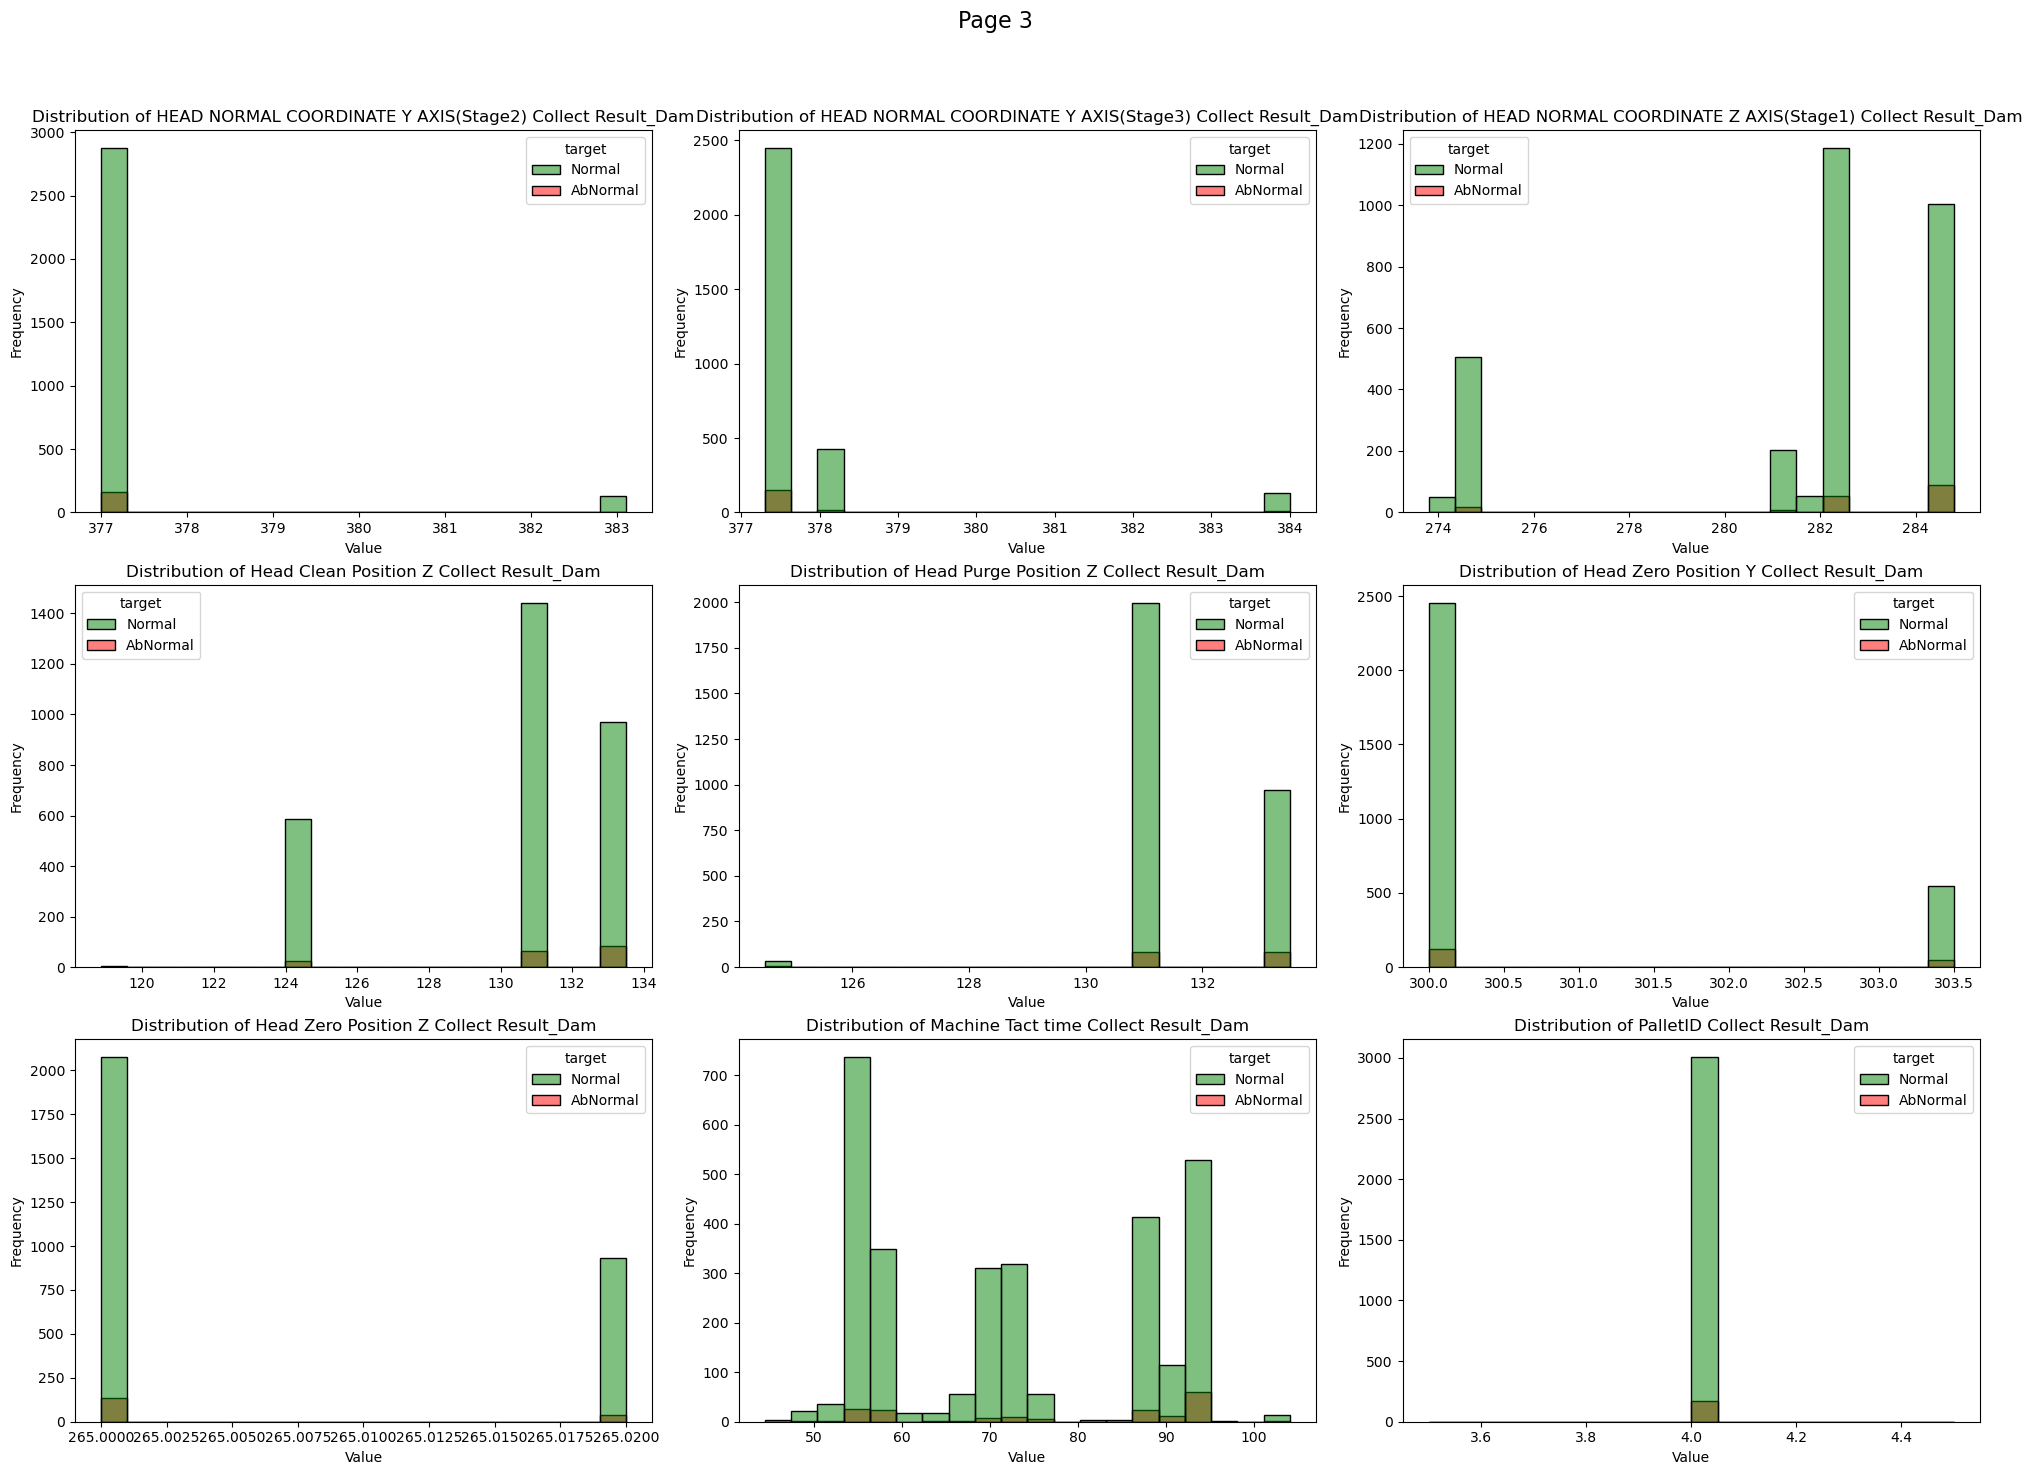

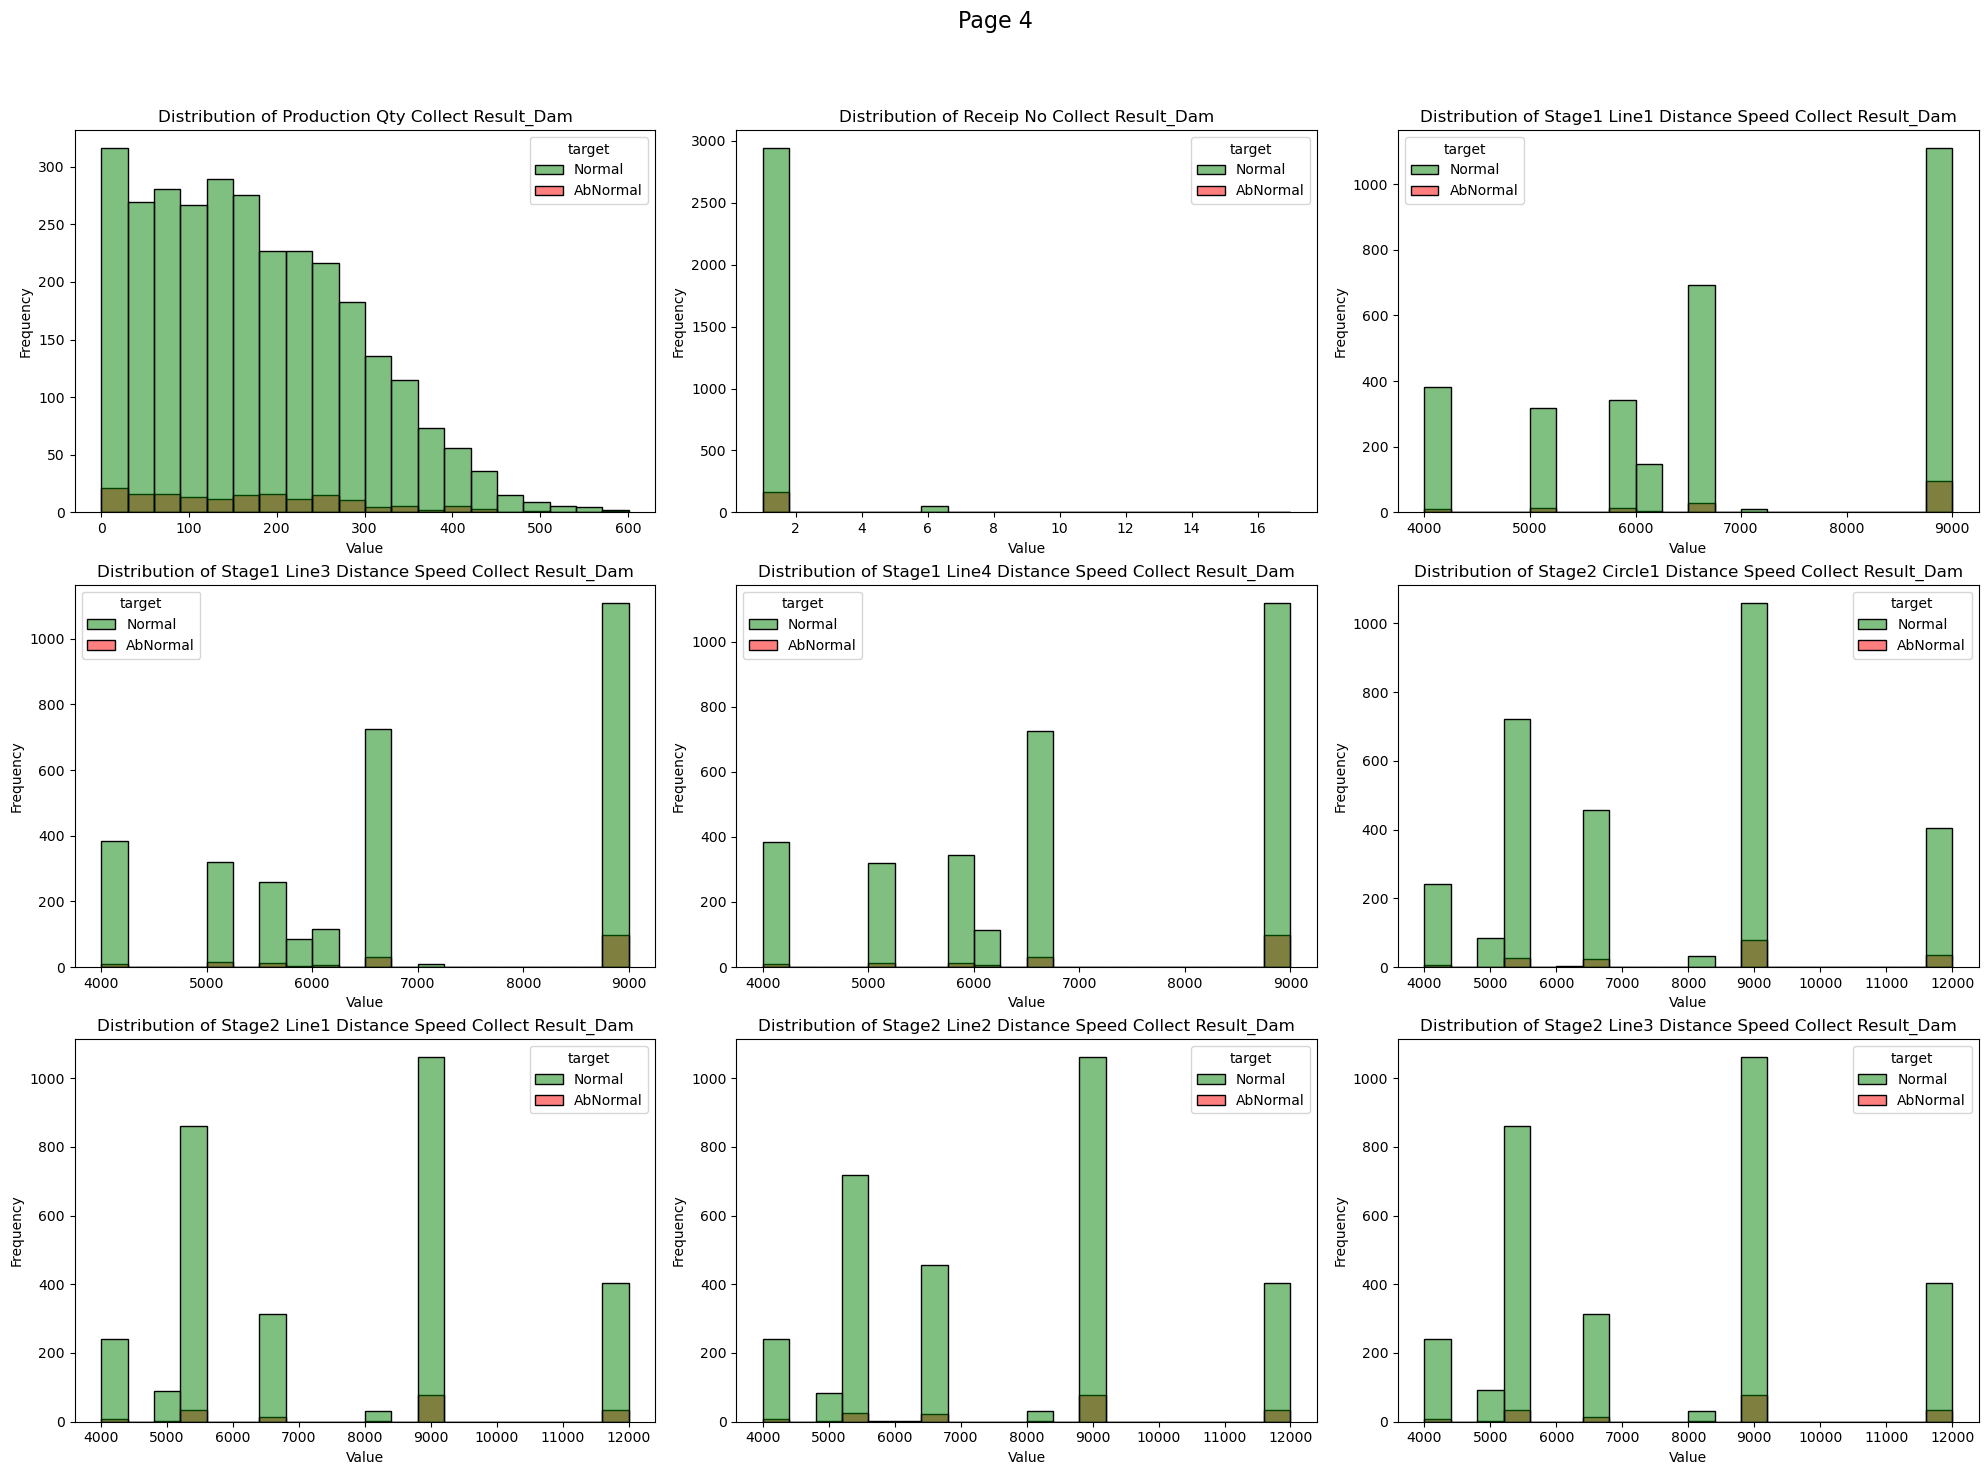

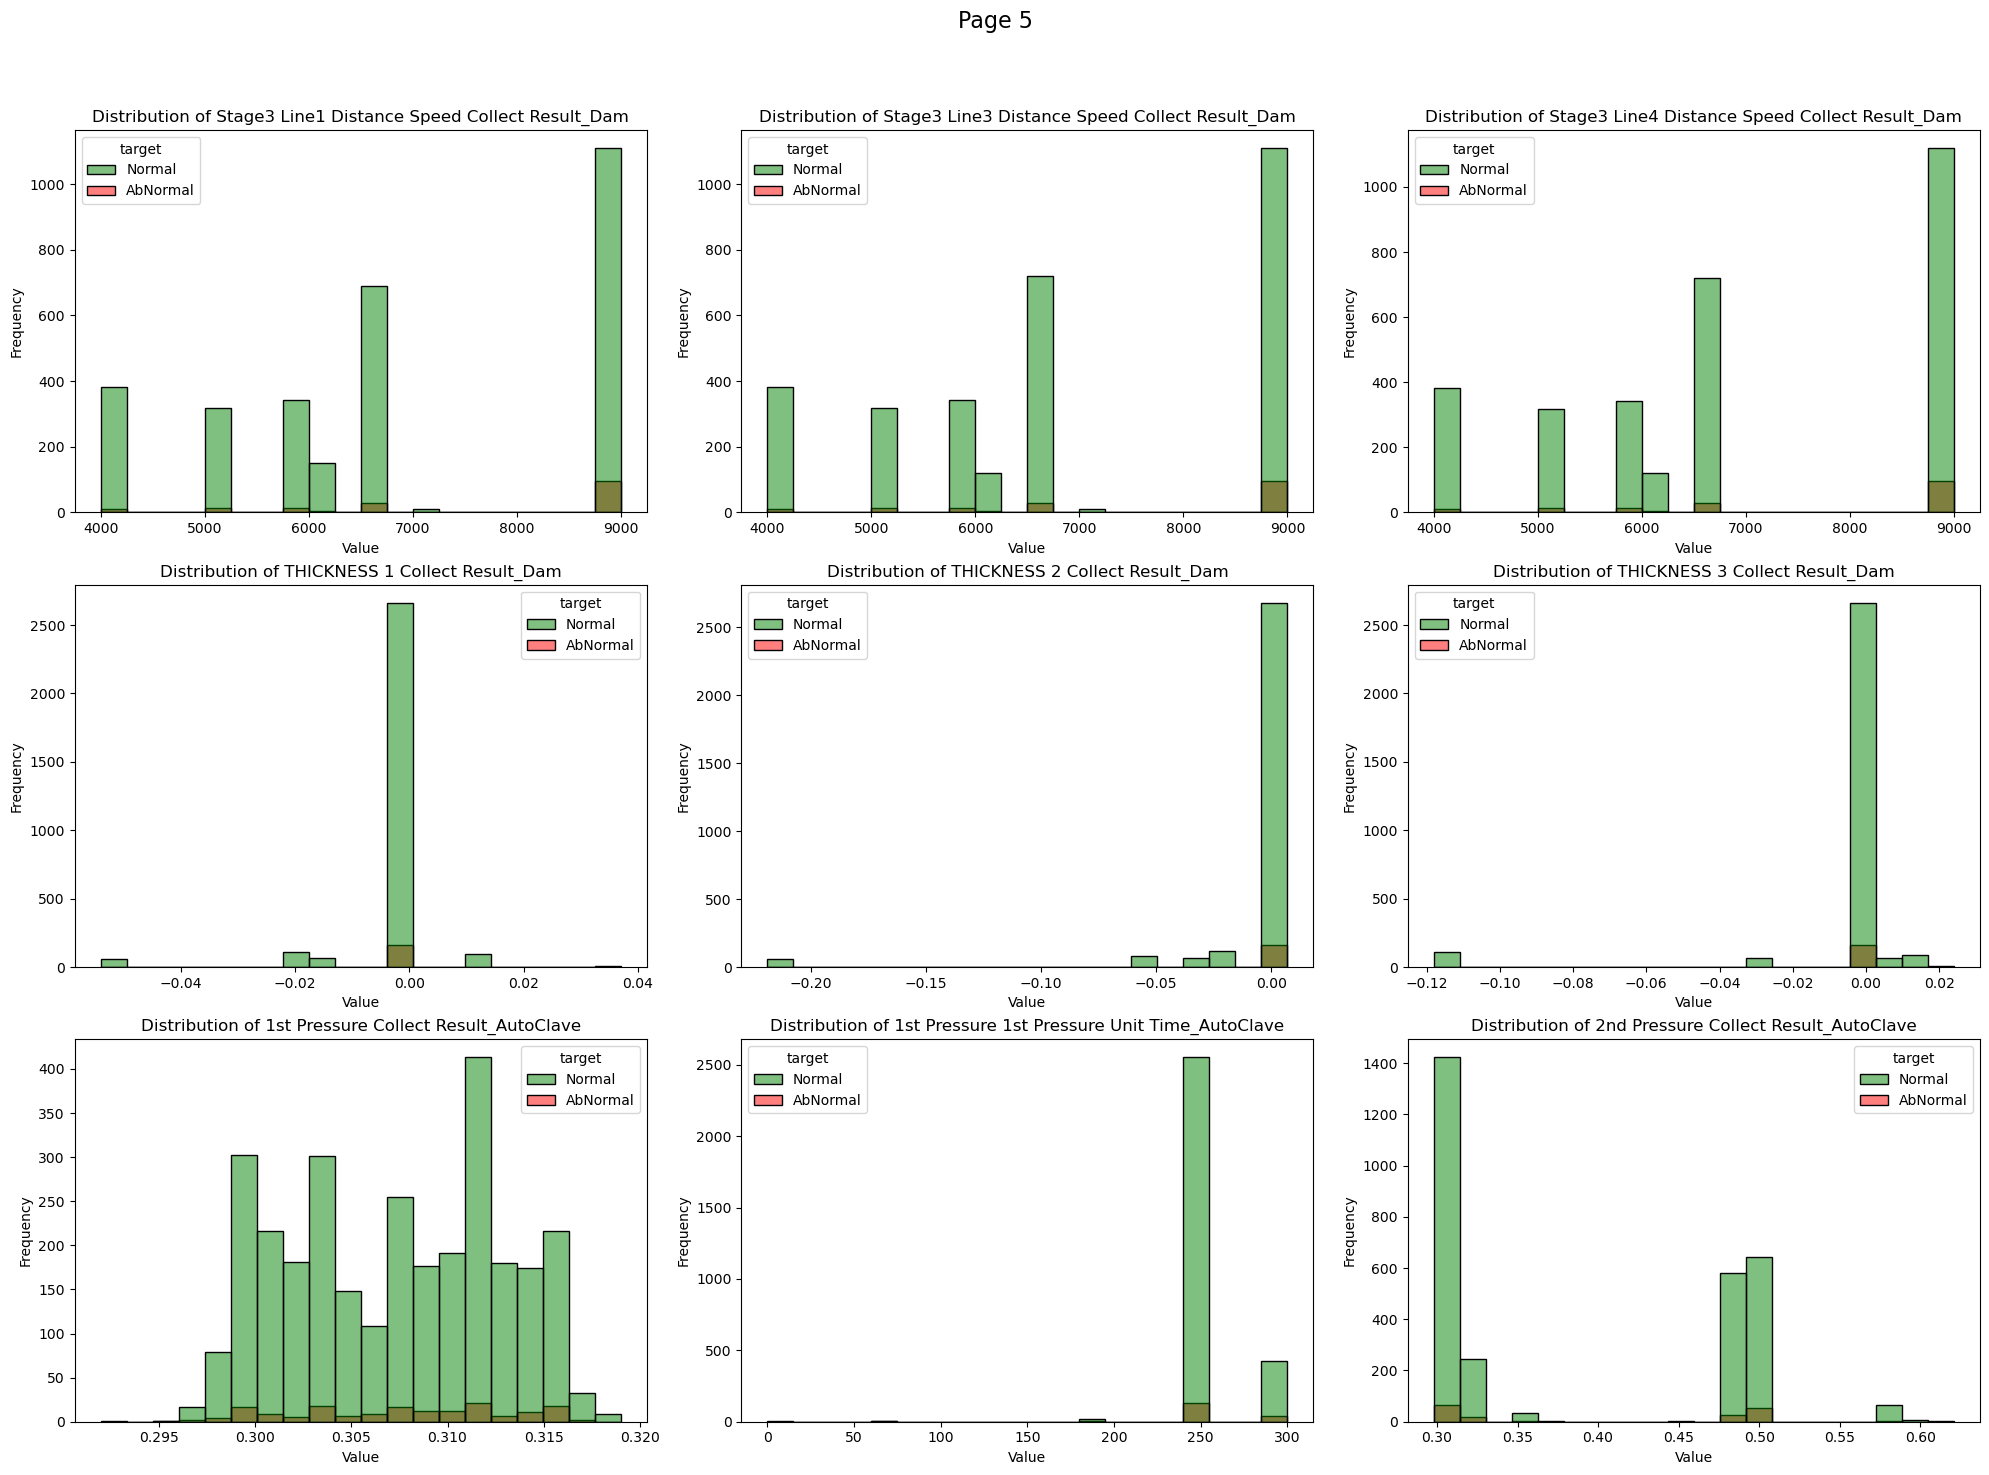

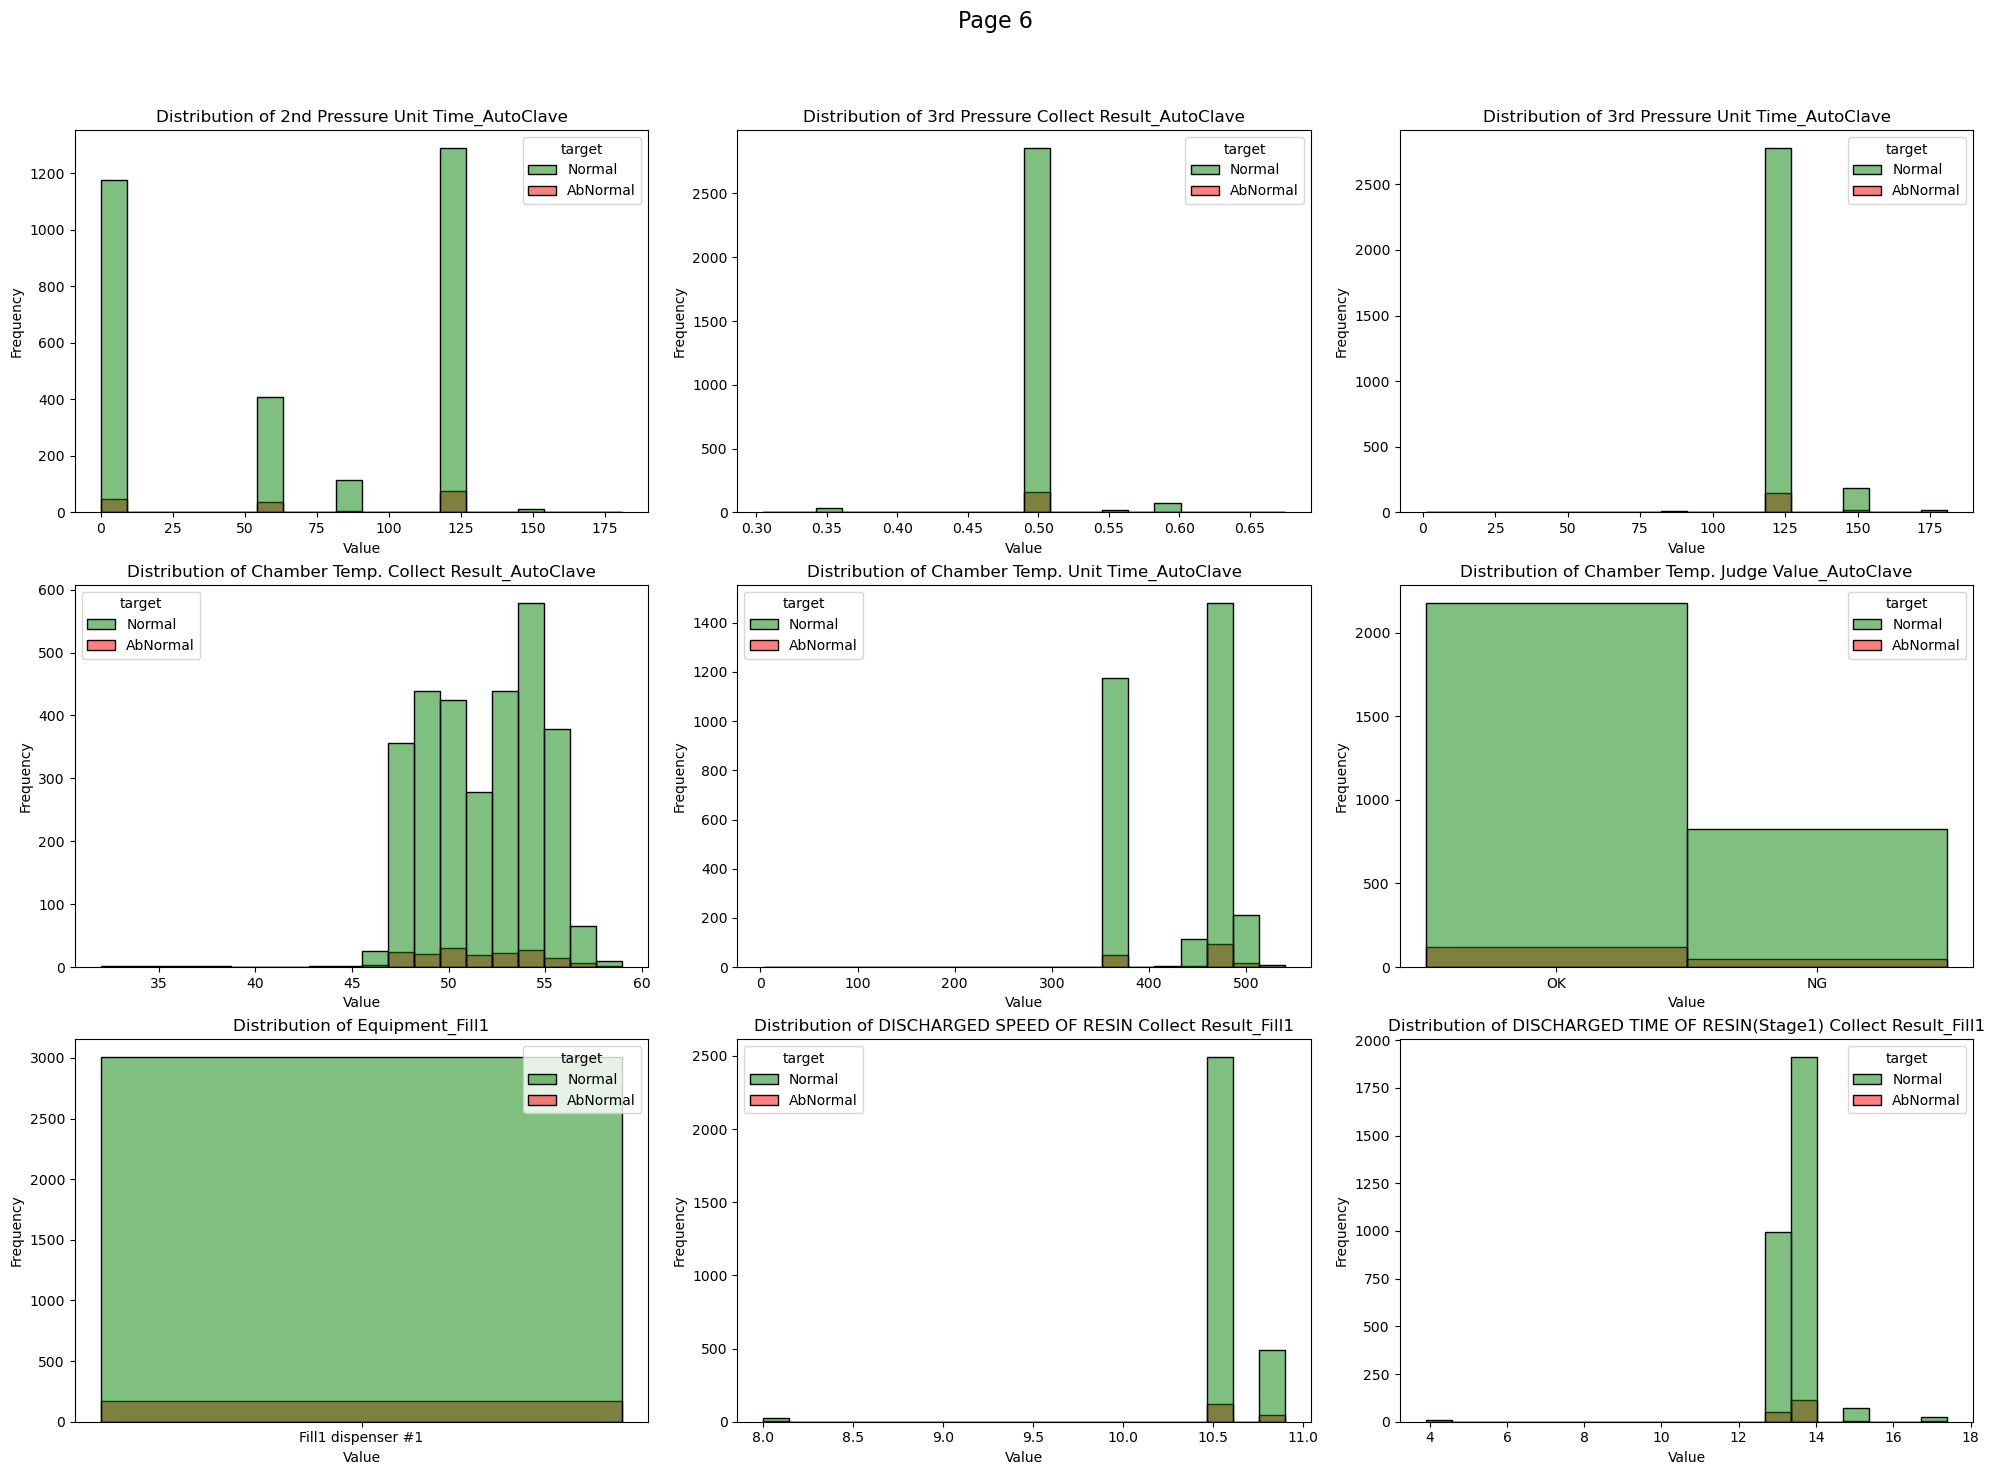

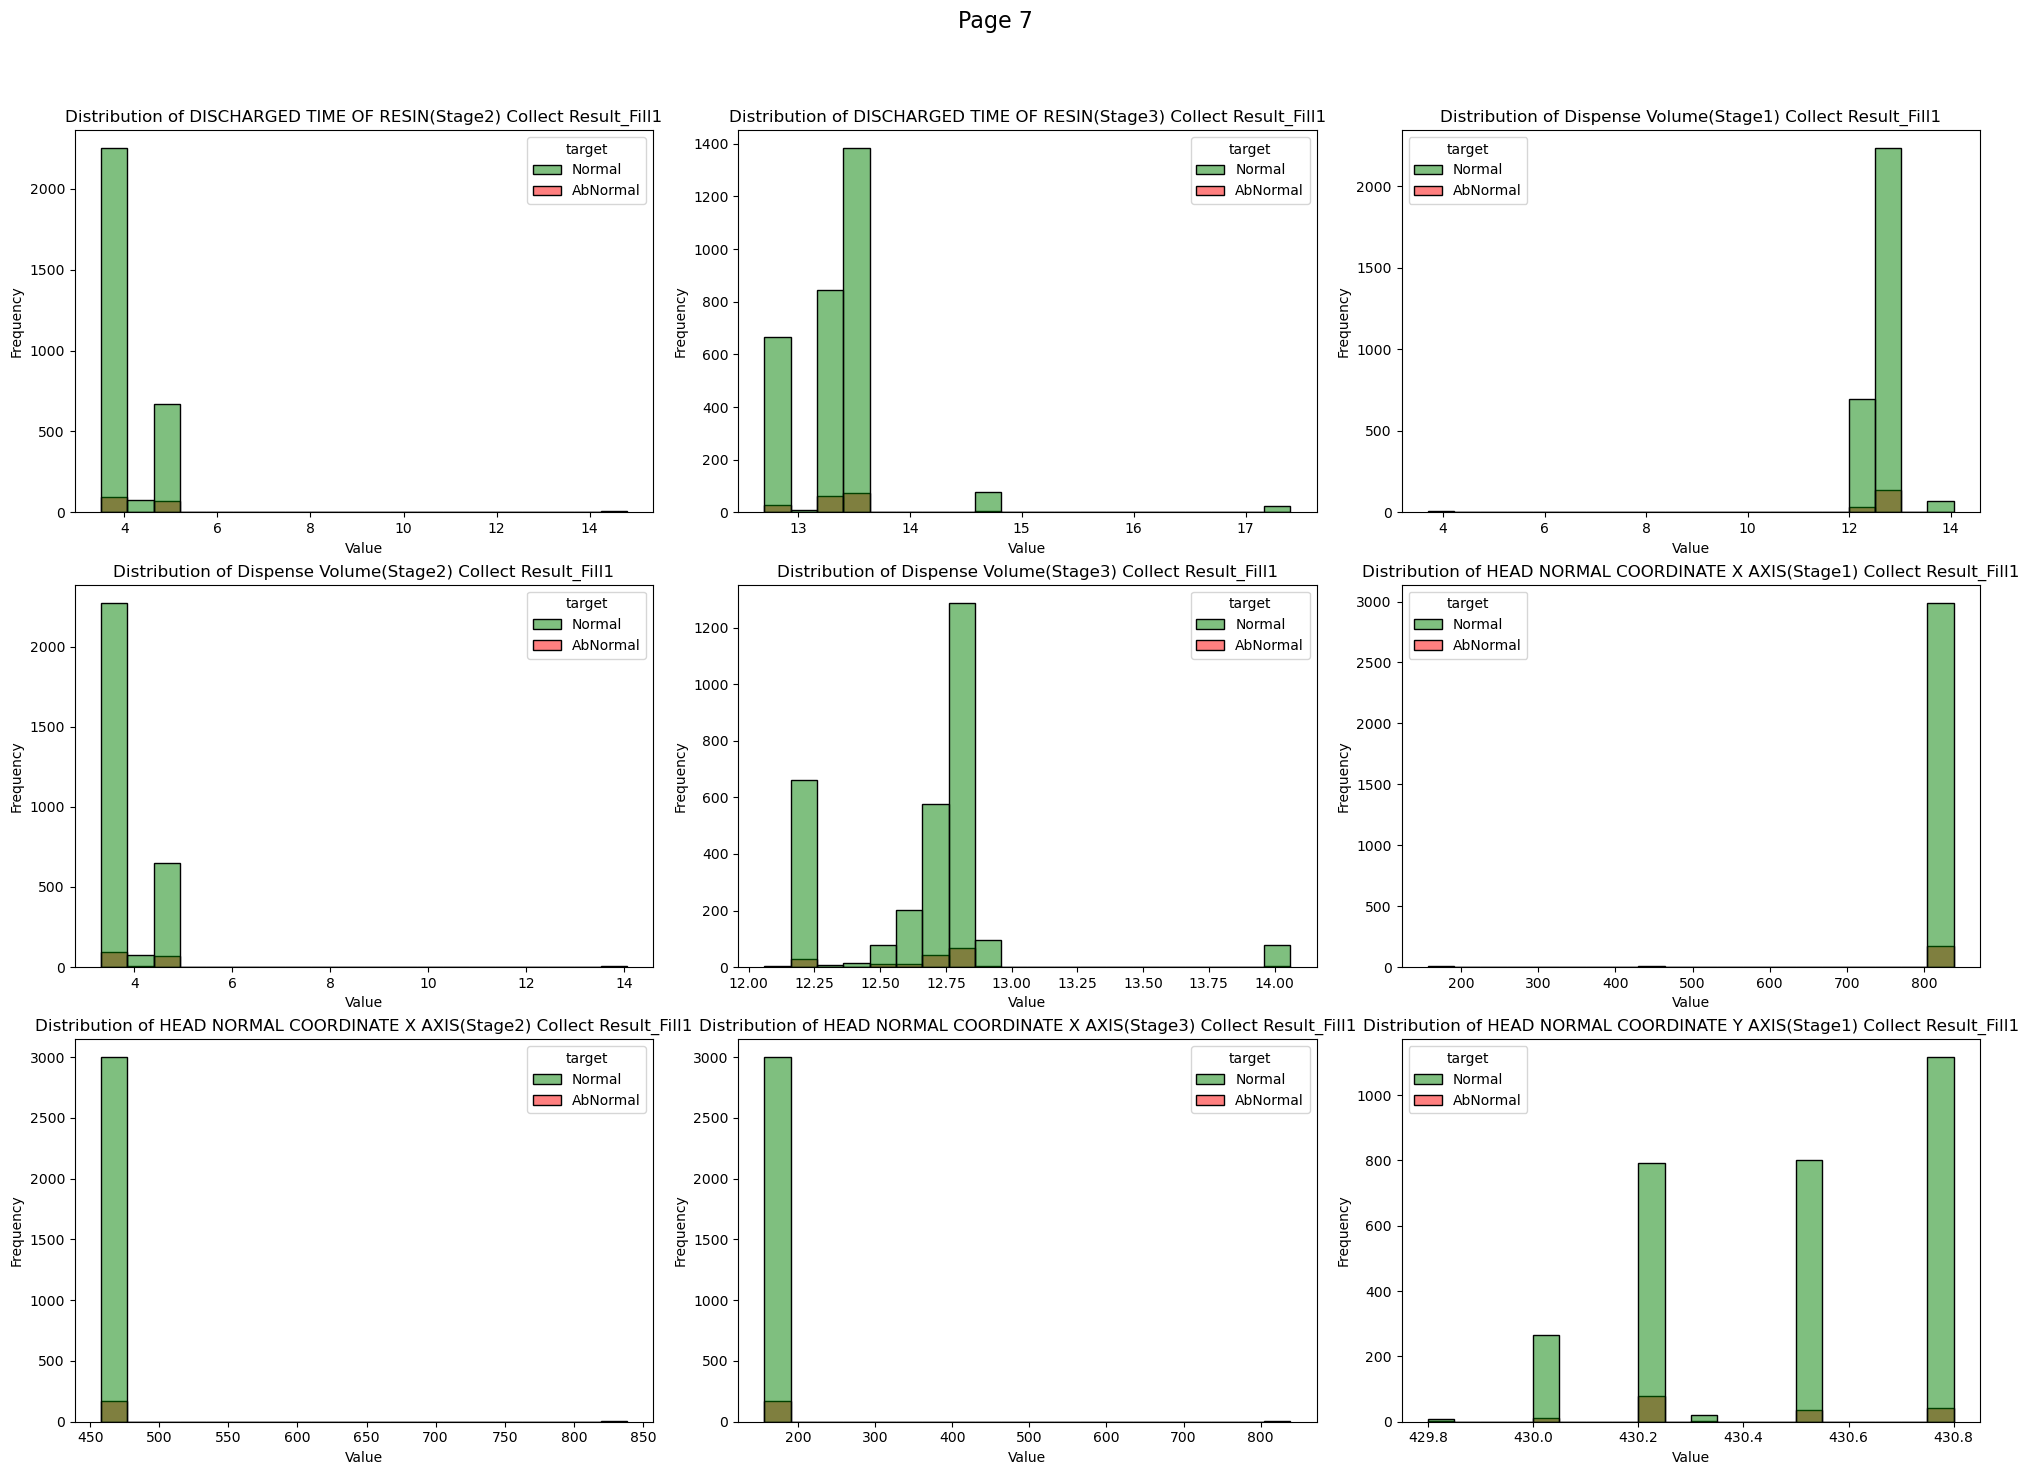

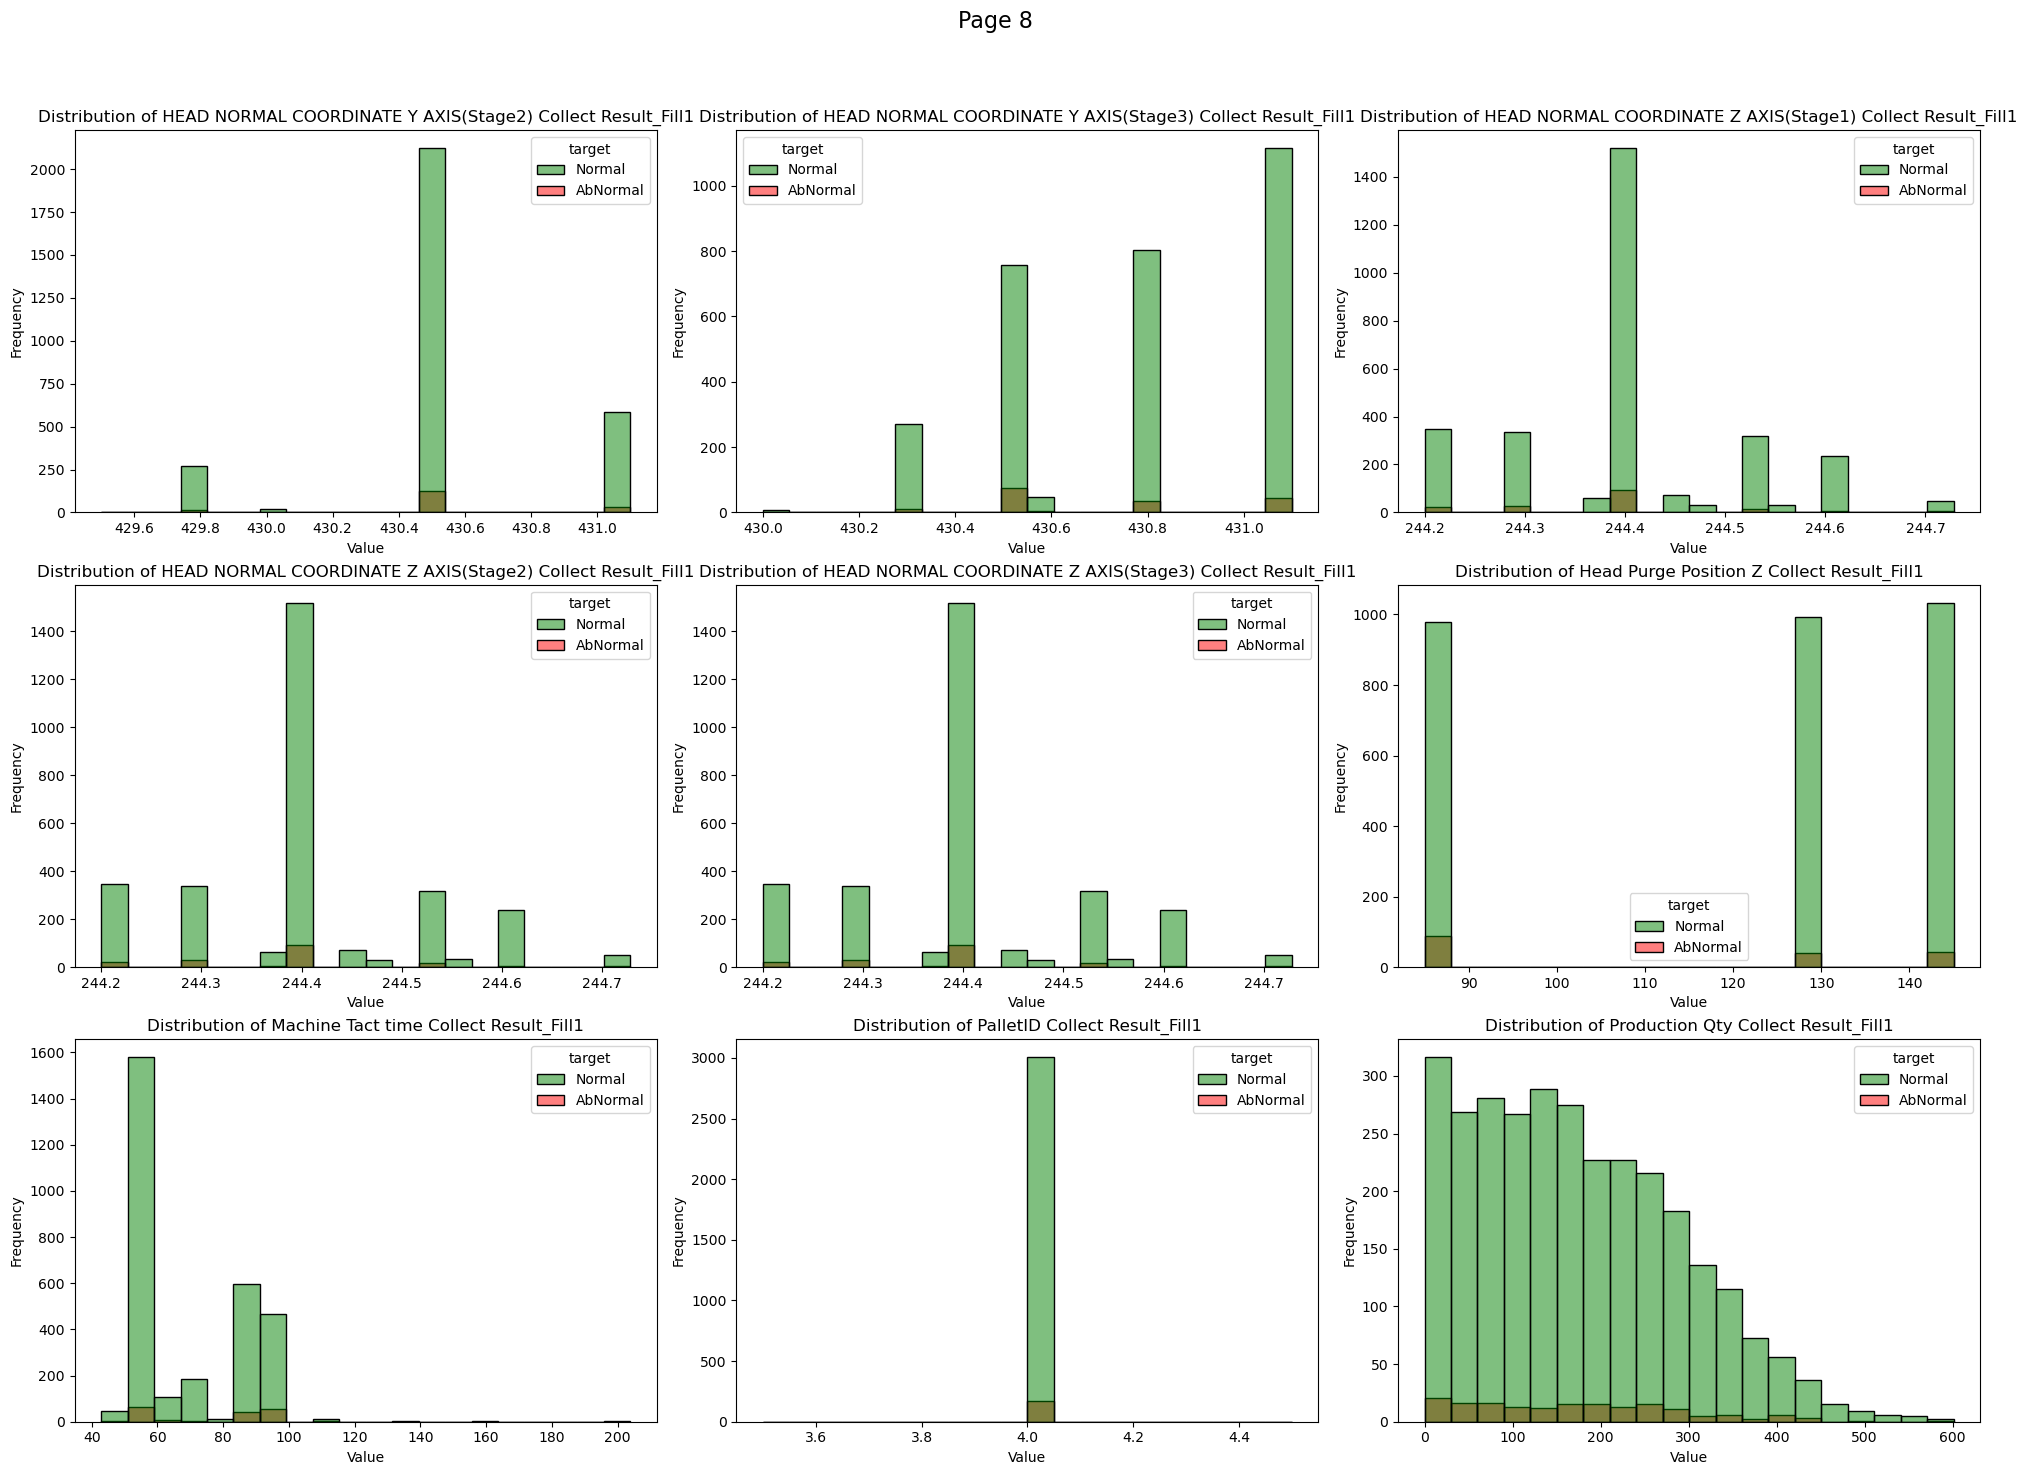

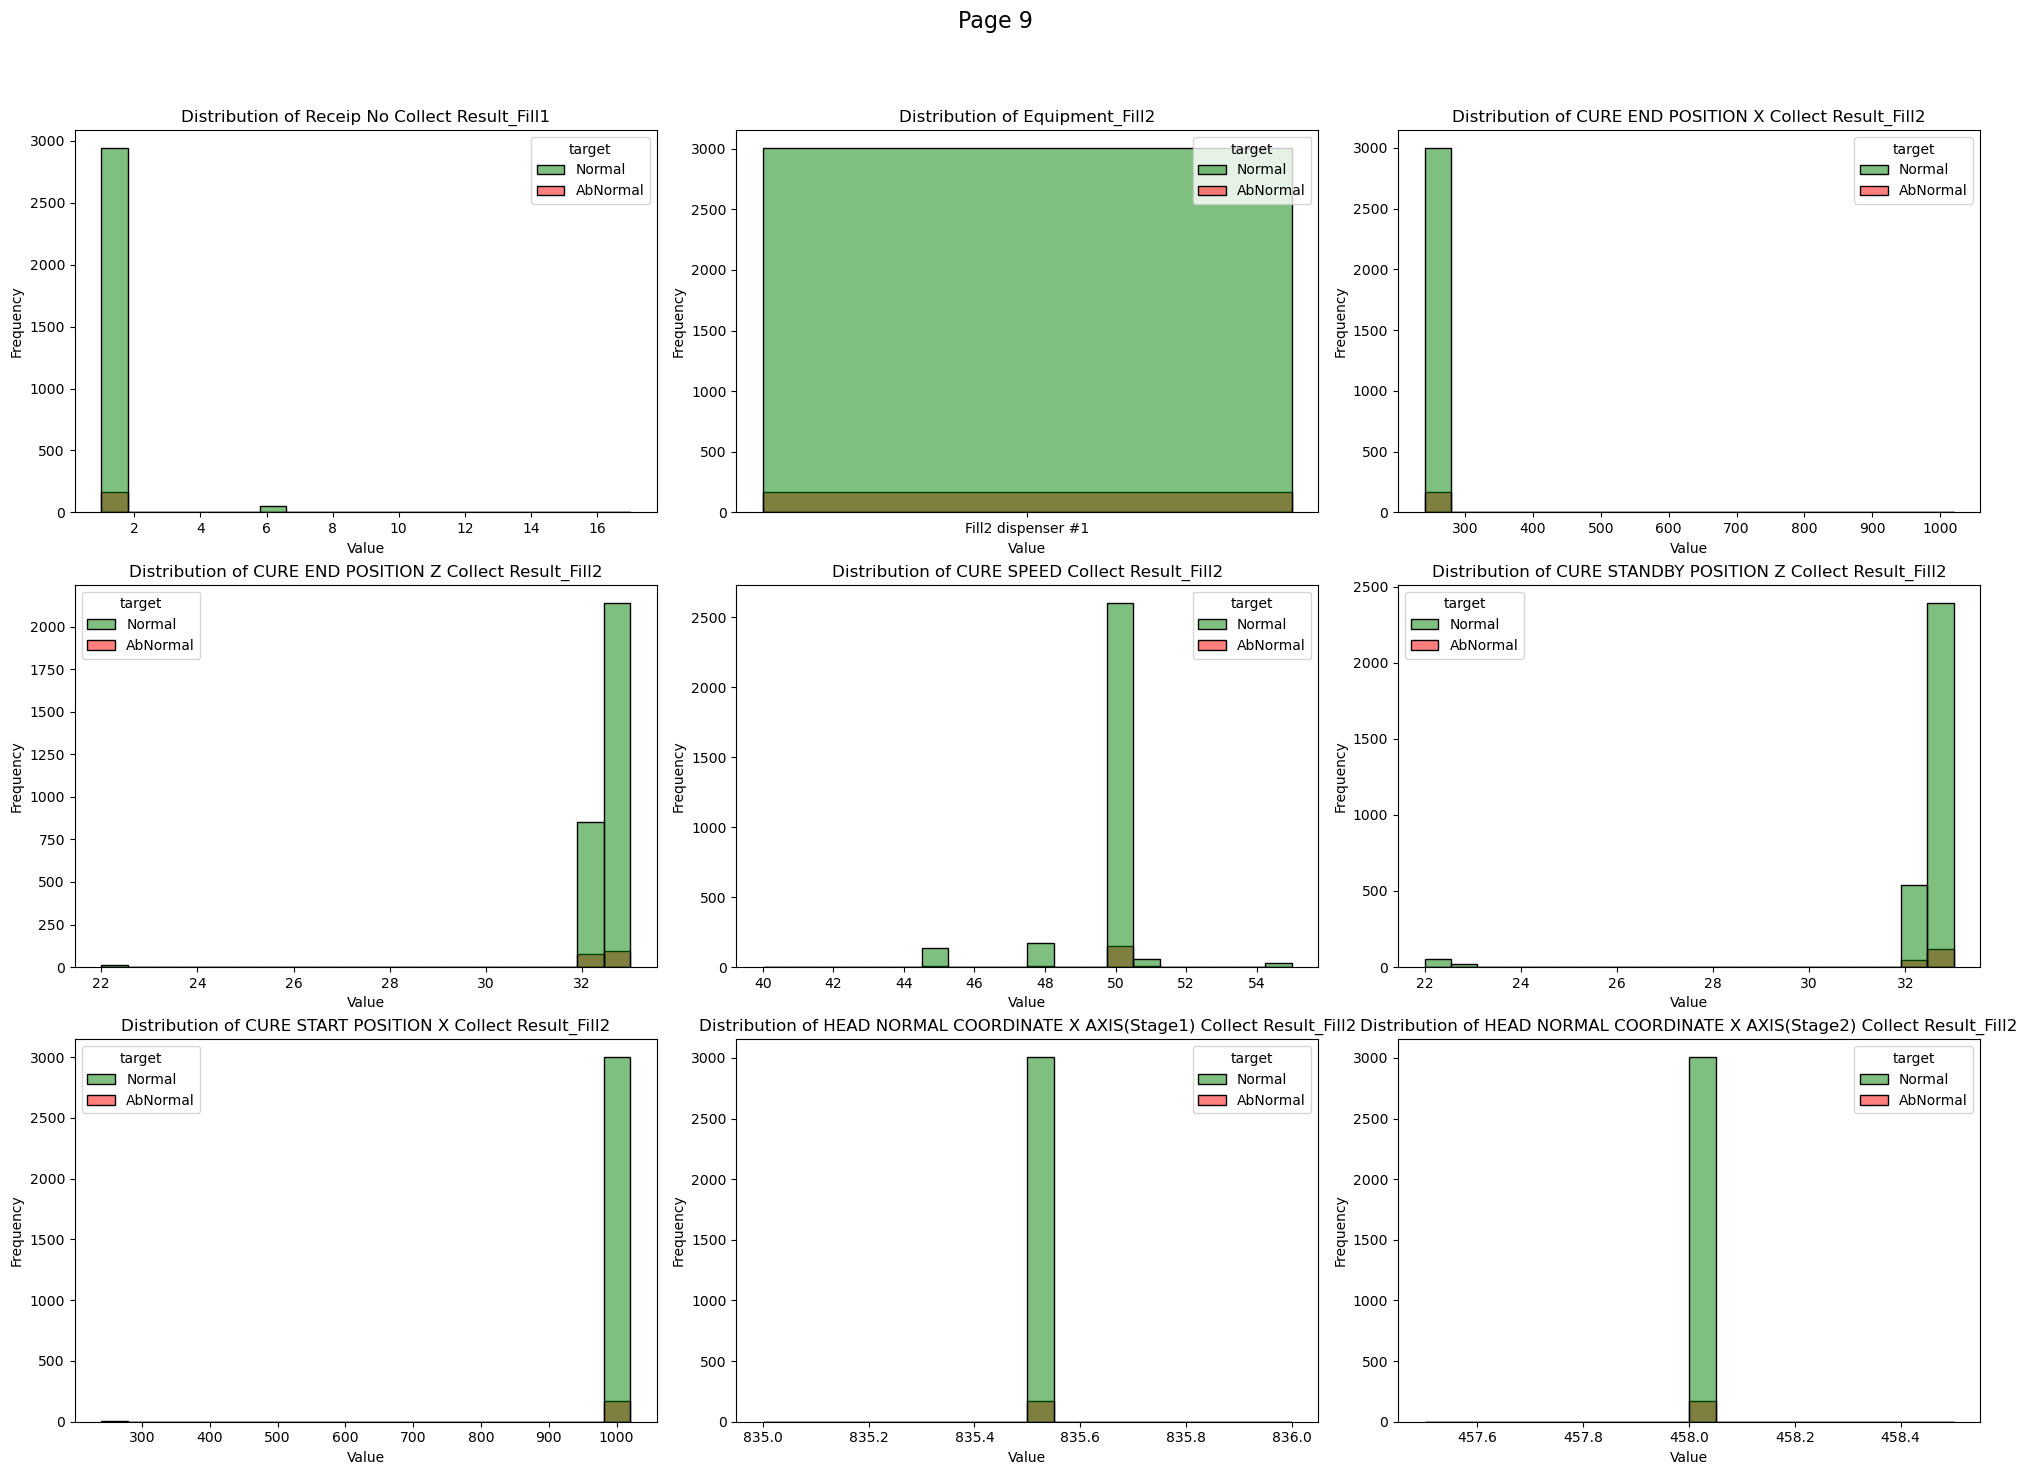

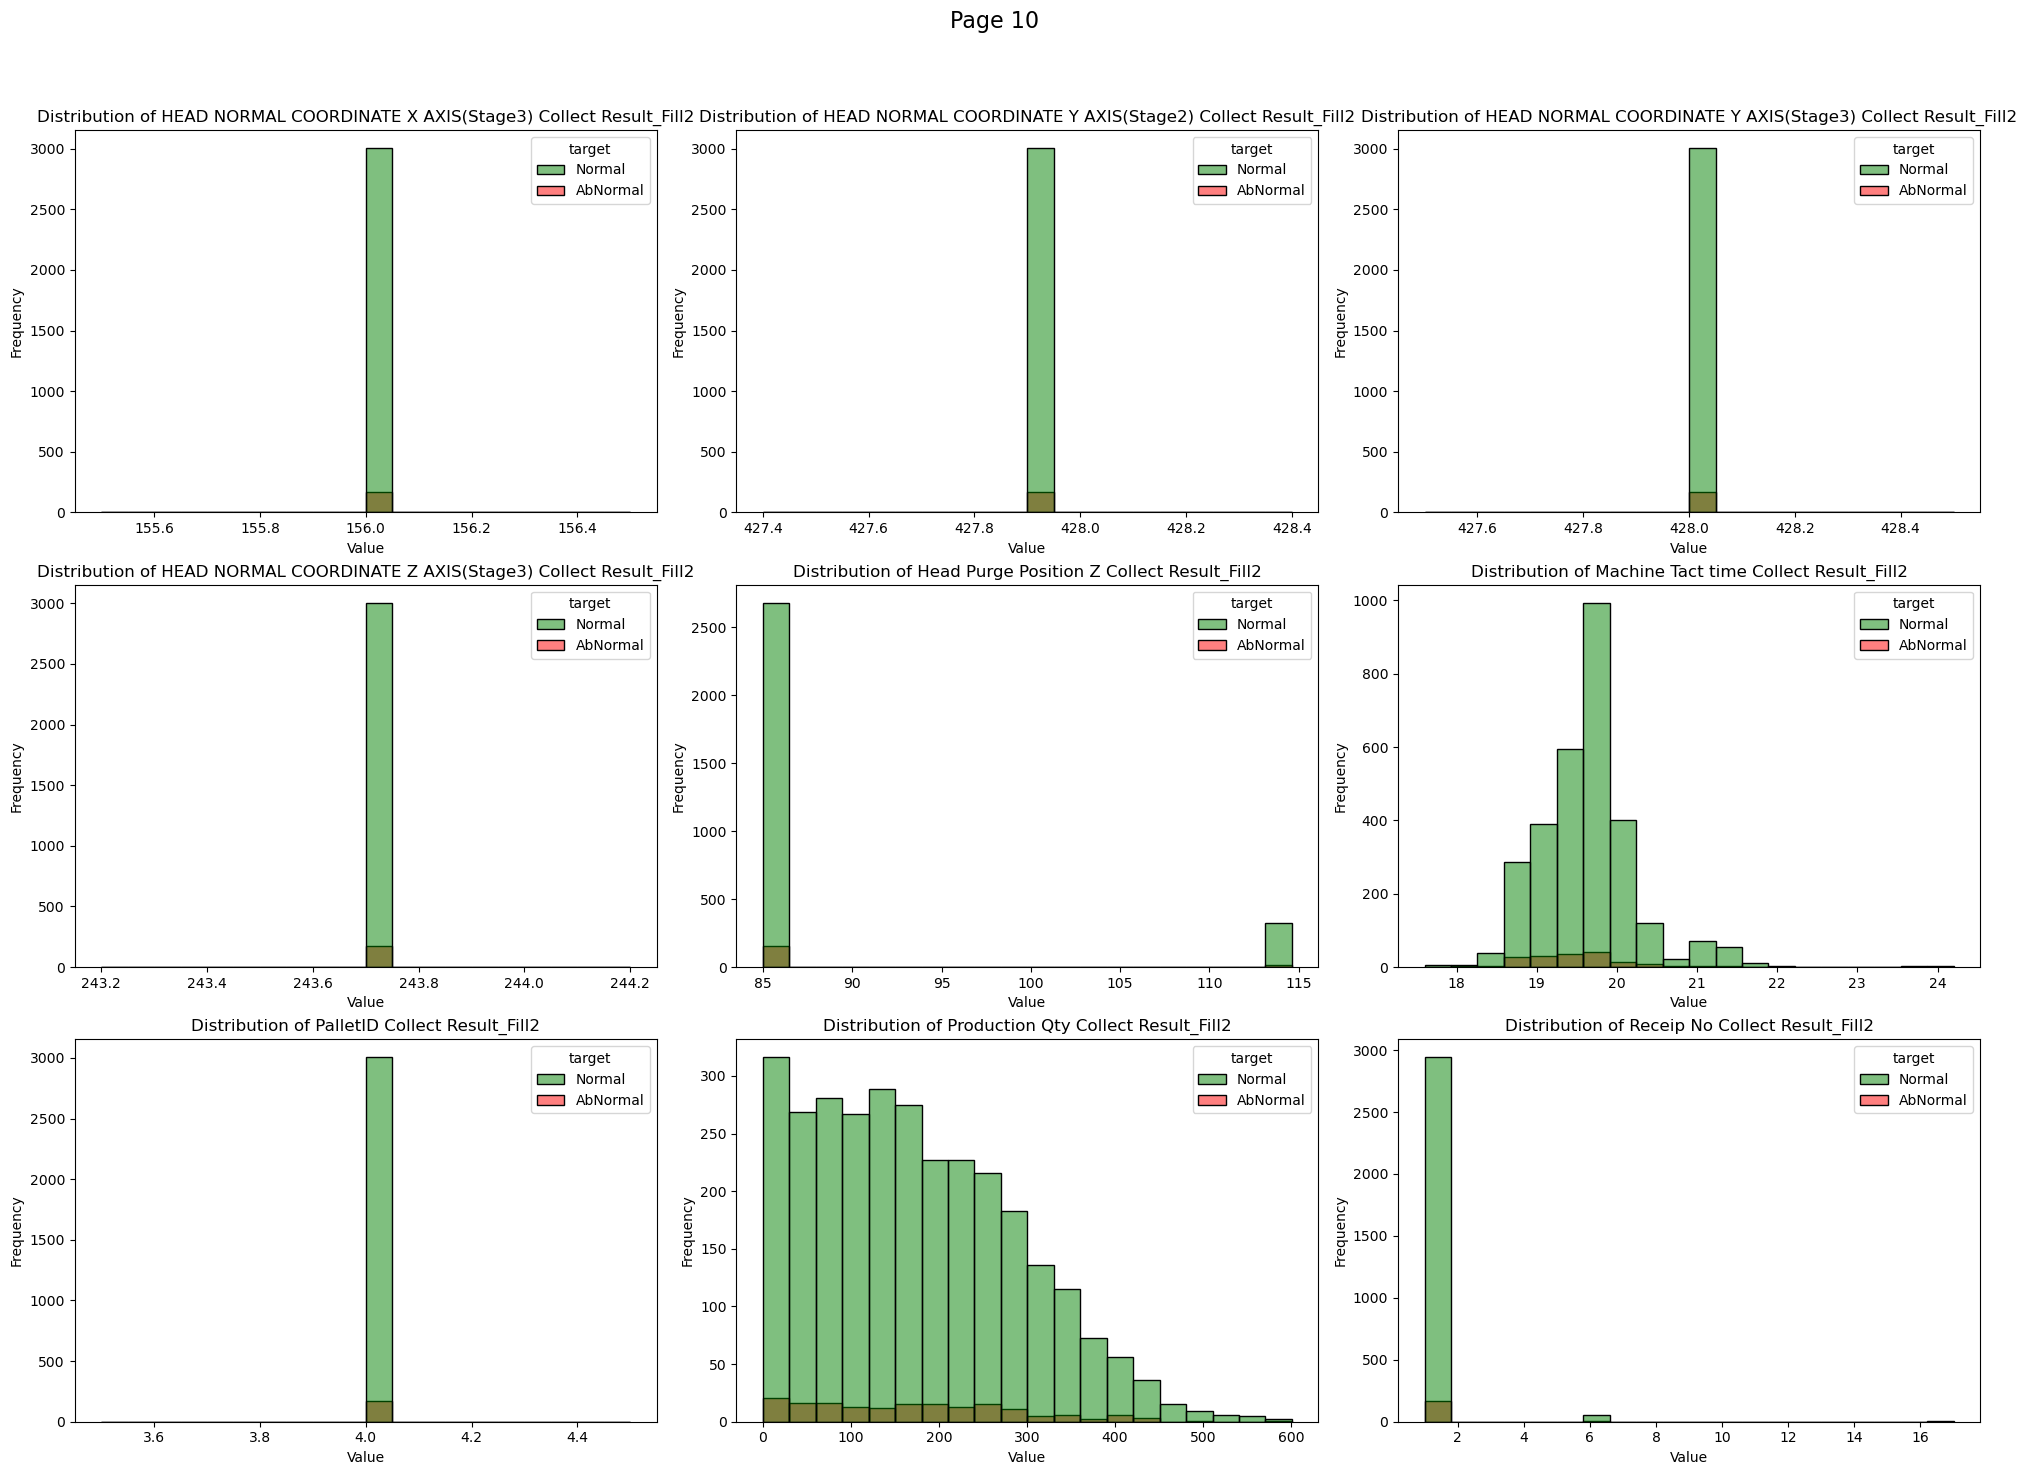

<Figure size 2000x1500 with 0 Axes>

In [36]:
palette = {
    'Normal': 'green',
    'AbNormal': 'red'
}

# 한 페이지에 보여줄 플롯 수 설정
plots_per_page = 9
num_pages = (len(eq1_id4.columns) - 1) // plots_per_page + 1

# 페이지별로 서브플롯 그리기
for page in range(num_pages):
    start_idx = page * plots_per_page
    end_idx = min(start_idx + plots_per_page, len(eq1_id4.columns)-1)
    features = eq1_id4.columns[start_idx:end_idx]

    # 페이지별 서브플롯 그리기
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        ax = axes[i]
        sns.histplot(
            data=eq1_id4,
            x=feature,
            hue='target',
            palette=palette,
            ax=ax,
            bins=20,
            element='bars',  # 선택사항: 빈의 외곽선 표시
            kde=False
        )
        ax.set_title(f'Distribution of {feature}')
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')

    # 사용되지 않는 서브플롯 숨기기
    for j in range(len(features), len(axes)):
        fig.delaxes(axes[j])

    # 서브플롯 간의 간격 조정
    plt.tight_layout()
    plt.suptitle(f'Page {page+1}', fontsize=16)
    plt.subplots_adjust(top=0.9)
    plt.show()

In [ ]:
def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

# 함수 사용해서 이상치 값 삭제
oulier_idx = get_outlier(df=df, column='A', weight=1.5)
print(outler_idx)
#df.drop(outlier_idx, axis=0, inplace=True)

In [205]:
from sklearn.preprocessing import LabelEncoder
qual_col = ['Equipment_Dam','Equipment_Fill1', 'Equipment_Fill2', 'Chamber Temp. Judge Value_AutoClave']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(data[i])
    data[i] = le.transform(data[i])


In [207]:
#data.info(verbose = True, null_counts = True)

In [ ]:
# for label in np.unique(test_x[i]): 
#        if label not in le.classes_: 
#            le.classes_ = np.append(le.classes_, label)
#    test_x[i] = le.transform(test_x[i]) 

In [158]:
#for i in data.select_dtypes(include = 'object'):
    #print(data.select_dtypes(include = 'object')[i].value_counts())